In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rc, rcParams
import datetime as dt
import warnings
import math
import random
import itertools

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix, roc_curve
from sklearn.model_selection import train_test_split, cross_validate, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier, LocalOutlierFactor

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier

from xgboost import XGBRFClassifier

from imblearn.over_sampling import SMOTE

from sklearn.metrics import balanced_accuracy_score
from imblearn.ensemble import BalancedBaggingClassifier

from imblearn.ensemble import BalancedRandomForestClassifier



In [56]:
data = pd.read_csv("cell2celltrain.csv")

# Data Dictionary


1. **CustomerID**: A unique identifier for each customer.
2. **Churn**: Binary indicator of whether the customer churned (Yes/No).
3. **MonthlyRevenue**: Monthly revenue generated by the customer.
4. **MonthlyMinutes**: Total minutes used by the customer monthly.
5. **TotalRecurringCharge**: Total recurring charges on the customer’s account.
6. **DirectorAssistedCalls**: Number of calls assisted by a director.
7. **OverageMinutes**: Total minutes exceeding the allocated monthly plan.
8. **RoamingCalls**: Number of calls made while roaming.
9. **PercChangeMinutes**: Percentage change in minutes used compared to the previous period.
10. **PercChangeRevenues**: Percentage change in revenue compared to the previous period.
11. **DroppedCalls**: Number of calls dropped due to connectivity issues.
12. **BlockedCalls**: Number of calls blocked by the network.
13. **UnansweredCalls**: Number of calls made but not answered.
14. **CustomerCareCalls**: Number of calls made to customer care.
15. **ThreewayCalls**: Number of three-way calls made.
16. **ReceivedCalls**: Number of calls received by the customer.
17. **OutboundCalls**: Number of calls made by the customer.
18. **InboundCalls**: Number of calls received by the customer.
19. **PeakCallsInOut**: Number of calls during peak hours.
20. **OffPeakCallsInOut**: Number of calls during off-peak hours.
21. **DroppedBlockedCalls**: Combined total of dropped and blocked calls.
22. **CallForwardingCalls**: Number of calls forwarded by the customer.
23. **CallWaitingCalls**: Number of calls placed on hold using call waiting.
24. **MonthsInService**: Number of months the customer has been in service.
25. **UniqueSubs**: Number of unique subscribers on the account.
26. **ActiveSubs**: Number of active subscribers on the account.
27. **ServiceArea**: Geographic service area of the customer.
28. **Handsets**: Number of handsets associated with the account.
29. **HandsetModels**: Number of unique handset models used by the customer.
30. **CurrentEquipmentDays**: Number of days the current equipment has been in use.
31. **AgeHH1**: Age of the head of household (primary).
32. **AgeHH2**: Age of the second head of household (if applicable).
33. **ChildrenInHH**: Number of children in the household.
34. **HandsetRefurbished**: Indicates if the handset is refurbished (Yes/No).
35. **HandsetWebCapable**: Indicates if the handset is web-capable (Yes/No).
36. **TruckOwner**: Indicates if the customer owns a truck (Yes/No).
37. **RVOwner**: Indicates if the customer owns a recreational vehicle (Yes/No).
38. **Homeownership**: Indicates if the customer owns a home (Yes/No).
39. **BuysViaMailOrder**: Indicates if the customer buys via mail order (Yes/No).
40. **RespondsToMailOffers**: Indicates if the customer responds to mail offers (Yes/No).
41. **OptOutMailings**: Indicates if the customer opted out of mailings (Yes/No).
42. **NonUSTravel**: Indicates if the customer has traveled outside the U.S. (Yes/No).
43. **OwnsComputer**: Indicates if the customer owns a computer (Yes/No).
44. **HasCreditCard**: Indicates if the customer owns a credit card (Yes/No).
45. **RetentionCalls**: Number of calls made to retain the customer.
46. **RetentionOffersAccepted**: Number of retention offers accepted by the customer.
47. **NewCellphoneUser**: Indicates if the customer is a new cellphone user (Yes/No).
48. **NotNewCellphoneUser**: Indicates if the customer is not a new cellphone user (Yes/No).
49. **ReferralsMadeBySubscriber**: Number of referrals made by the customer.
50. **IncomeGroup**: Income group of the customer (categorical).
51. **OwnsMotorcycle**: Indicates if the customer owns a motorcycle (Yes/No).
52. **AdjustmentsToCreditRating**: Adjustments made to the customer’s credit rating.
53. **HandsetPrice**: Price of the handset.
54. **MadeCallToRetentionTeam**: Indicates if the customer made a call to the retention team (Yes/No).
55. **CreditRating**: Customer’s credit rating (categorical or numeric).
56. **PrizmCode**: Segmentation code indicating the customer’s lifestyle or demographic group.
57. **Occupation**: Occupation of the customer.
58. **MaritalStatus**: Marital status of the customer. 



In [57]:
data.shape

(51047, 58)

In [58]:
data.head()

,CustomerID,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,...,ReferralsMadeBySubscriber,IncomeGroup,OwnsMotorcycle,AdjustmentsToCreditRating,HandsetPrice,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus
0,3000002,Yes,24.00,219.0,22.0,0.25,0.0,0.0,-157.0,-19.0,...,0,4,No,0,30,Yes,1-Highest,Suburban,Professional,No
1,3000010,Yes,16.99,10.0,17.0,0.00,0.0,0.0,-4.0,0.0,...,0,5,No,0,30,No,4-Medium,Suburban,Professional,Yes
2,3000014,No,38.00,8.0,38.0,0.00,0.0,0.0,-2.0,0.0,...,0,6,No,0,Unknown,No,3-Good,Town,Crafts,Yes
3,3000022,No,82.28,1312.0,75.0,1.24,0.0,0.0,157.0,8.1,...,0,6,No,0,10,No,4-Medium,Other,Other,No
4,3000026,Yes,17.14,0.0,17.0,0.00,0.0,0.0,0.0,-0.2,...,0,9,No,1,10,No,1-Highest,Other,Professional,Yes


In [62]:
data['CreditRating'] = data['CreditRating'].str.split('-').str[1]

In [63]:
data.CreditRating.unique()

array(['Highest', 'Medium', 'Good', 'VeryLow', 'High', 'Low', 'Lowest'],
      dtype=object)

In [64]:
data.head()

,CustomerID,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,...,ReferralsMadeBySubscriber,IncomeGroup,OwnsMotorcycle,AdjustmentsToCreditRating,HandsetPrice,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus
0,3000002,Yes,24.00,219.0,22.0,0.25,0.0,0.0,-157.0,-19.0,...,0,4,No,0,30,Yes,Highest,Suburban,Professional,No
1,3000010,Yes,16.99,10.0,17.0,0.00,0.0,0.0,-4.0,0.0,...,0,5,No,0,30,No,Medium,Suburban,Professional,Yes
2,3000014,No,38.00,8.0,38.0,0.00,0.0,0.0,-2.0,0.0,...,0,6,No,0,Unknown,No,Good,Town,Crafts,Yes
3,3000022,No,82.28,1312.0,75.0,1.24,0.0,0.0,157.0,8.1,...,0,6,No,0,10,No,Medium,Other,Other,No
4,3000026,Yes,17.14,0.0,17.0,0.00,0.0,0.0,0.0,-0.2,...,0,9,No,1,10,No,Highest,Other,Professional,Yes


In [65]:
data.columns

Index(['CustomerID', 'Churn', 'MonthlyRevenue', 'MonthlyMinutes',
       'TotalRecurringCharge', 'DirectorAssistedCalls', 'OverageMinutes',
       'RoamingCalls', 'PercChangeMinutes', 'PercChangeRevenues',
       'DroppedCalls', 'BlockedCalls', 'UnansweredCalls', 'CustomerCareCalls',
       'ThreewayCalls', 'ReceivedCalls', 'OutboundCalls', 'InboundCalls',
       'PeakCallsInOut', 'OffPeakCallsInOut', 'DroppedBlockedCalls',
       'CallForwardingCalls', 'CallWaitingCalls', 'MonthsInService',
       'UniqueSubs', 'ActiveSubs', 'ServiceArea', 'Handsets', 'HandsetModels',
       'CurrentEquipmentDays', 'AgeHH1', 'AgeHH2', 'ChildrenInHH',
       'HandsetRefurbished', 'HandsetWebCapable', 'TruckOwner', 'RVOwner',
       'Homeownership', 'BuysViaMailOrder', 'RespondsToMailOffers',
       'OptOutMailings', 'NonUSTravel', 'OwnsComputer', 'HasCreditCard',
       'RetentionCalls', 'RetentionOffersAccepted', 'NewCellphoneUser',
       'NotNewCellphoneUser', 'ReferralsMadeBySubscriber', 'IncomeGro

In [66]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51047 entries, 0 to 51046
Data columns (total 58 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   CustomerID                 51047 non-null  int64  
 1   Churn                      51047 non-null  object 
 2   MonthlyRevenue             50891 non-null  float64
 3   MonthlyMinutes             50891 non-null  float64
 4   TotalRecurringCharge       50891 non-null  float64
 5   DirectorAssistedCalls      50891 non-null  float64
 6   OverageMinutes             50891 non-null  float64
 7   RoamingCalls               50891 non-null  float64
 8   PercChangeMinutes          50680 non-null  float64
 9   PercChangeRevenues         50680 non-null  float64
 10  DroppedCalls               51047 non-null  float64
 11  BlockedCalls               51047 non-null  float64
 12  UnansweredCalls            51047 non-null  float64
 13  CustomerCareCalls          51047 non-null  flo

In [67]:
data.isnull().sum()

CustomerID                     0
Churn                          0
MonthlyRevenue               156
MonthlyMinutes               156
TotalRecurringCharge         156
DirectorAssistedCalls        156
OverageMinutes               156
RoamingCalls                 156
PercChangeMinutes            367
PercChangeRevenues           367
DroppedCalls                   0
BlockedCalls                   0
UnansweredCalls                0
CustomerCareCalls              0
ThreewayCalls                  0
ReceivedCalls                  0
OutboundCalls                  0
InboundCalls                   0
PeakCallsInOut                 0
OffPeakCallsInOut              0
DroppedBlockedCalls            0
CallForwardingCalls            0
CallWaitingCalls               0
MonthsInService                0
UniqueSubs                     0
ActiveSubs                     0
ServiceArea                   24
Handsets                       1
HandsetModels                  1
CurrentEquipmentDays           1
AgeHH1    

In [68]:
categorical_columns = data.select_dtypes(include=['object', 'category']).columns.tolist()
categorical_columns

['Churn',
 'ServiceArea',
 'ChildrenInHH',
 'HandsetRefurbished',
 'HandsetWebCapable',
 'TruckOwner',
 'RVOwner',
 'Homeownership',
 'BuysViaMailOrder',
 'RespondsToMailOffers',
 'OptOutMailings',
 'NonUSTravel',
 'OwnsComputer',
 'HasCreditCard',
 'NewCellphoneUser',
 'NotNewCellphoneUser',
 'OwnsMotorcycle',
 'HandsetPrice',
 'MadeCallToRetentionTeam',
 'CreditRating',
 'PrizmCode',
 'Occupation',
 'MaritalStatus']

In [69]:
numerical_columns = data.select_dtypes(include=['int64', 'float64']).columns.tolist()
numerical_columns

['CustomerID',
 'MonthlyRevenue',
 'MonthlyMinutes',
 'TotalRecurringCharge',
 'DirectorAssistedCalls',
 'OverageMinutes',
 'RoamingCalls',
 'PercChangeMinutes',
 'PercChangeRevenues',
 'DroppedCalls',
 'BlockedCalls',
 'UnansweredCalls',
 'CustomerCareCalls',
 'ThreewayCalls',
 'ReceivedCalls',
 'OutboundCalls',
 'InboundCalls',
 'PeakCallsInOut',
 'OffPeakCallsInOut',
 'DroppedBlockedCalls',
 'CallForwardingCalls',
 'CallWaitingCalls',
 'MonthsInService',
 'UniqueSubs',
 'ActiveSubs',
 'Handsets',
 'HandsetModels',
 'CurrentEquipmentDays',
 'AgeHH1',
 'AgeHH2',
 'RetentionCalls',
 'RetentionOffersAccepted',
 'ReferralsMadeBySubscriber',
 'IncomeGroup',
 'AdjustmentsToCreditRating']

In [70]:
imputer_numeric = SimpleImputer(strategy='median')
data[numerical_columns] = imputer_numeric.fit_transform(data[numerical_columns])

In [71]:
data.isnull().sum()

CustomerID                    0
Churn                         0
MonthlyRevenue                0
MonthlyMinutes                0
TotalRecurringCharge          0
DirectorAssistedCalls         0
OverageMinutes                0
RoamingCalls                  0
PercChangeMinutes             0
PercChangeRevenues            0
DroppedCalls                  0
BlockedCalls                  0
UnansweredCalls               0
CustomerCareCalls             0
ThreewayCalls                 0
ReceivedCalls                 0
OutboundCalls                 0
InboundCalls                  0
PeakCallsInOut                0
OffPeakCallsInOut             0
DroppedBlockedCalls           0
CallForwardingCalls           0
CallWaitingCalls              0
MonthsInService               0
UniqueSubs                    0
ActiveSubs                    0
ServiceArea                  24
Handsets                      0
HandsetModels                 0
CurrentEquipmentDays          0
AgeHH1                        0
AgeHH2  

In [72]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,51047.0,3.201957e+06,116905.561666,3000002.00,3100632.00,3201534.00,3305376.00,3399994.00
MonthlyRevenue,51047.0,5.880279e+01,44.442964,-6.17,33.66,48.46,70.96,1223.38
MonthlyMinutes,51047.0,5.251655e+02,529.134170,0.00,159.00,366.00,722.00,7359.00
TotalRecurringCharge,51047.0,4.682450e+01,23.812615,-11.00,30.00,45.00,60.00,400.00
DirectorAssistedCalls,51047.0,8.932572e-01,2.225423,0.00,0.00,0.25,0.99,159.39
OverageMinutes,51047.0,3.991463e+01,96.462028,0.00,0.00,3.00,40.00,4321.00
RoamingCalls,51047.0,1.232466e+00,9.803517,0.00,0.00,0.00,0.20,1112.40
PercChangeMinutes,51047.0,-1.150083e+01,256.587986,-3875.00,-82.00,-5.00,65.00,5192.00
PercChangeRevenues,51047.0,-1.185572e+00,39.432467,-1107.70,-6.90,-0.30,1.55,2483.50
DroppedCalls,51047.0,6.011489e+00,9.043955,0.00,0.70,3.00,7.70,221.70


In [73]:
data.duplicated().sum()

0

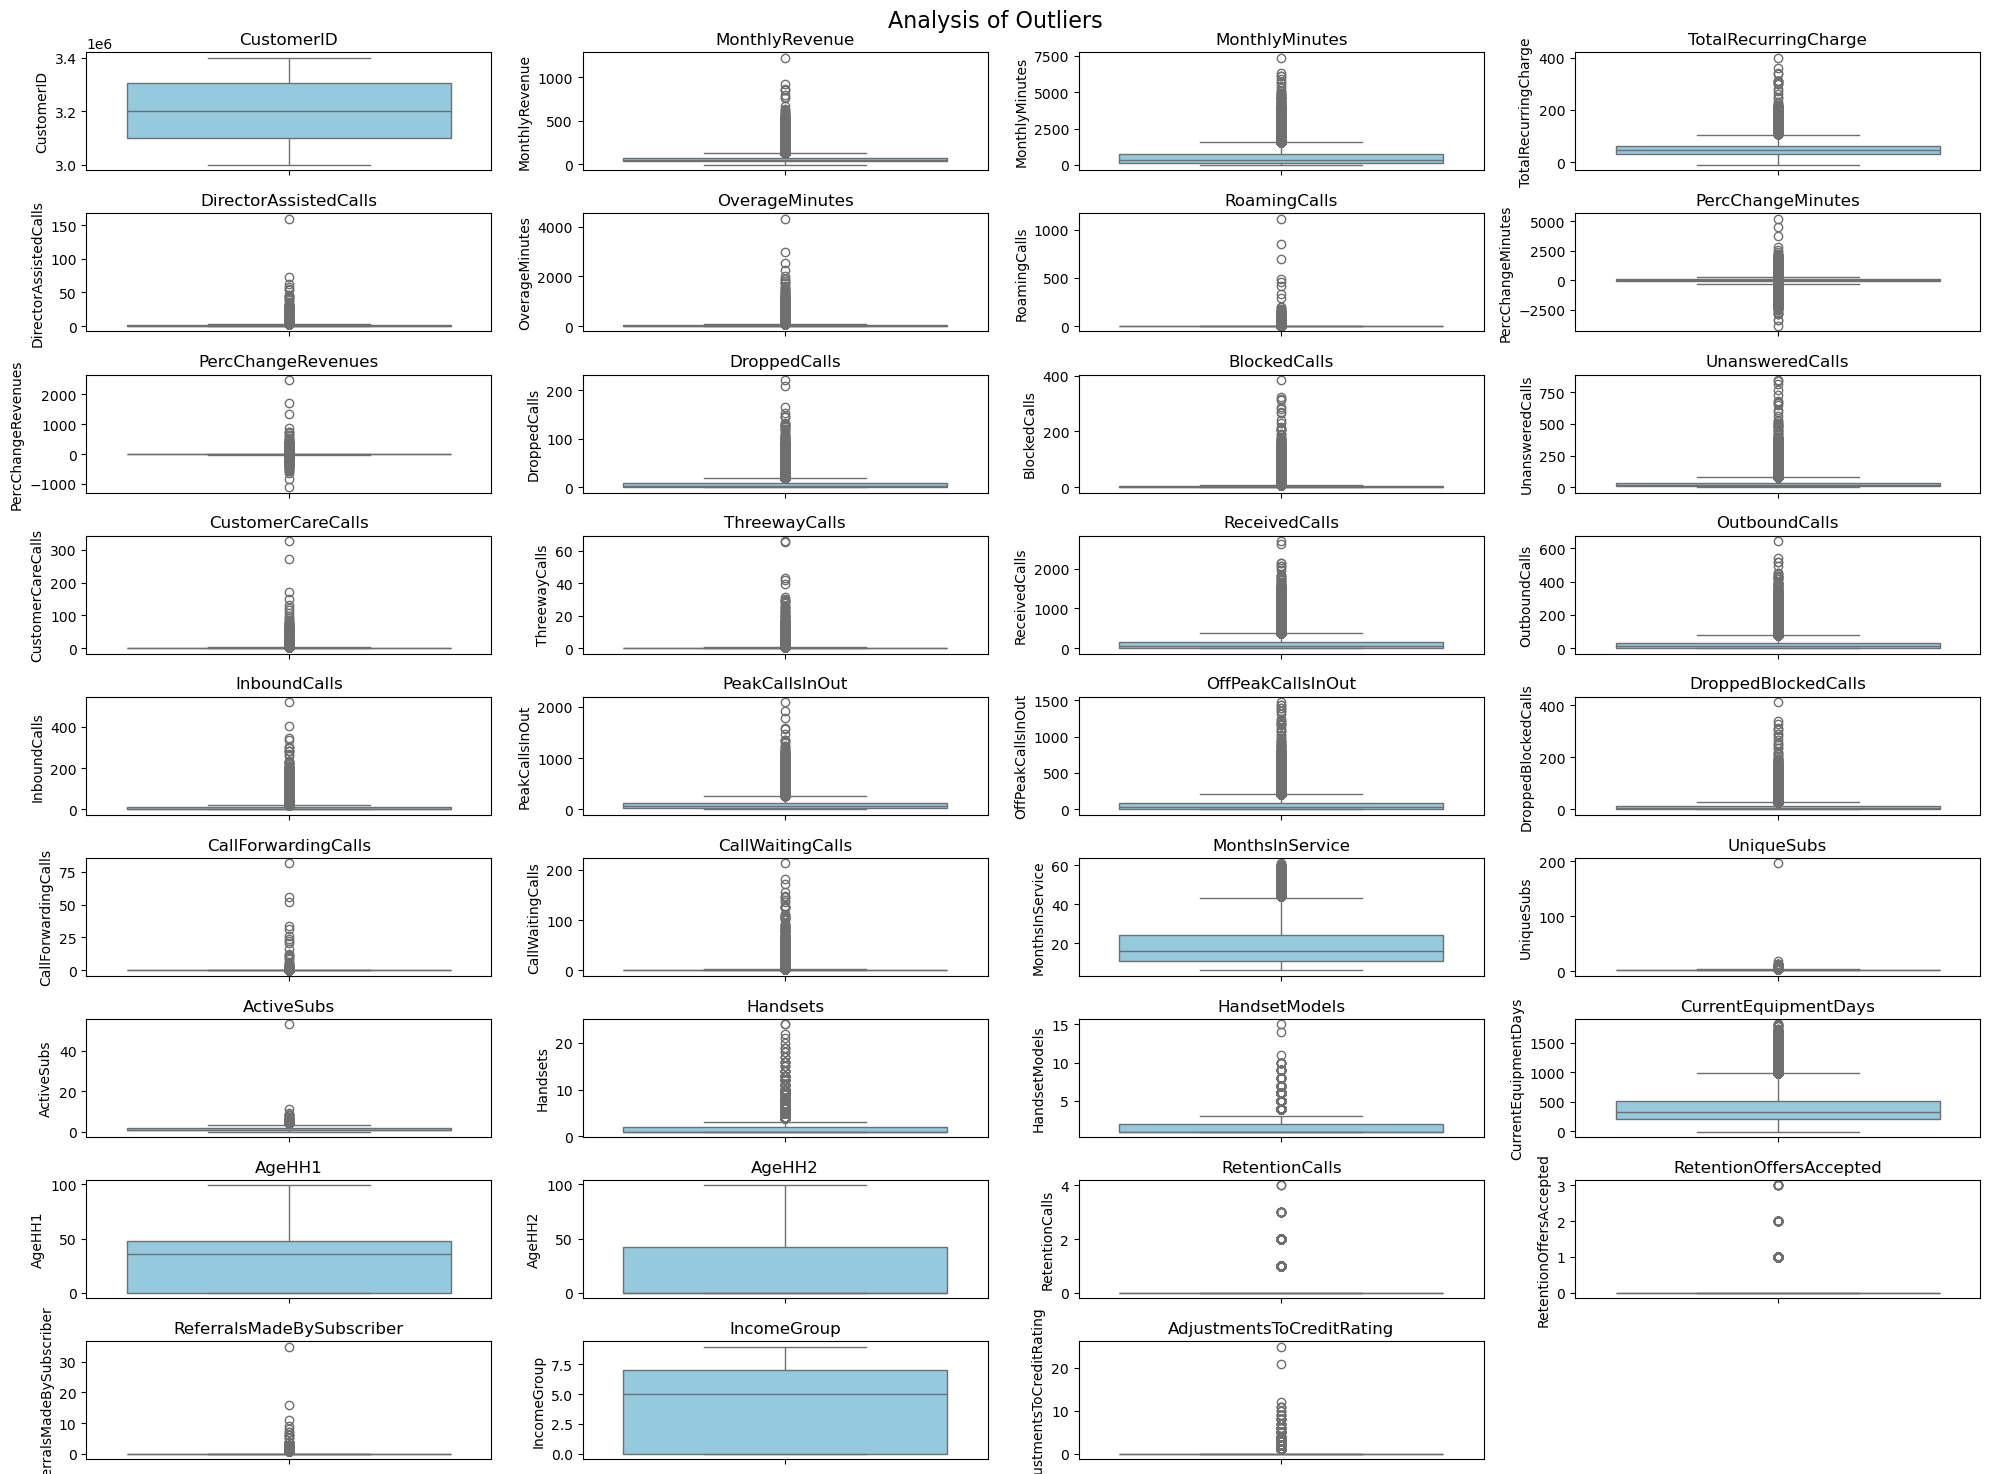

In [74]:
plt.figure(figsize=(20, 15))

plt.suptitle("Analysis of Outliers", fontsize=16)

for i, col in enumerate(numerical_columns, 1):

    plt.subplot(len(numerical_columns) // 4 + 1, 4, i)

    sns.boxplot(y=data[col], color='skyblue')

    plt.title(col)

    plt.tight_layout()



plt.show()

In [75]:
def outlier_thresholds(dataframe, variable, q1=0.25, q3=0.75):
    q1 = dataframe[variable].quantile(q1)
    q3 = dataframe[variable].quantile(q3)
    iqr = q3 - q1
    lower_limit = q1 - 1.5 * iqr
    upper_limit = q3 + 1.5 * iqr
    return lower_limit, upper_limit

for i in numerical_columns:
    print(i, ":", outlier_thresholds(data, i))


CustomerID : (2793516.0, 3612492.0)
MonthlyRevenue : (-22.29, 126.91)
MonthlyMinutes : (-685.5, 1566.5)
TotalRecurringCharge : (-15.0, 105.0)
DirectorAssistedCalls : (-1.4849999999999999, 2.4749999999999996)
OverageMinutes : (-60.0, 100.0)
RoamingCalls : (-0.30000000000000004, 0.5)
PercChangeMinutes : (-302.5, 285.5)
PercChangeRevenues : (-19.575000000000003, 14.225000000000001)
DroppedCalls : (-9.8, 18.2)


BlockedCalls : (-5.550000000000001, 9.25)
UnansweredCalls : (-41.199999999999996, 82.79999999999998)
CustomerCareCalls : (-2.55, 4.25)
ThreewayCalls : (-0.44999999999999996, 0.75)
ReceivedCalls : (-209.49999999999997, 371.29999999999995)
OutboundCalls : (-42.75, 80.05)
InboundCalls : (-13.950000000000001, 23.25)
PeakCallsInOut : (-124.44999999999999, 268.75)
OffPeakCallsInOut : (-105.55000000000001, 205.25)
DroppedBlockedCalls : (-14.200000000000003, 28.200000000000003)
CallForwardingCalls : (0.0, 0.0)
CallWaitingCalls : (-1.9500000000000002, 3.25)
MonthsInService : (-8.5, 43.5)
UniqueSubs : (-0.5, 3.5)
ActiveSubs : (-0.5, 3.5)
Handsets : (-0.5, 3.5)
HandsetModels : (-0.5, 3.5)
CurrentEquipmentDays : (-260.0, 980.0)
AgeHH1 : (-72.0, 120.0)
AgeHH2 : (-63.0, 105.0)
RetentionCalls : (0.0, 0.0)
RetentionOffersAccepted : (0.0, 0.0)
ReferralsMadeBySubscriber : (0.0, 0.0)
IncomeGroup : (-10.5, 17.5)
AdjustmentsToCreditRating : (0.0, 0.0)


In [76]:
def check_outlier(dataframe, variable):
    """
    Check if a variable in the dataframe contains outliers.

    Parameters:
    dataframe (pd.DataFrame): The dataframe containing the variable to check.
    variable (str): The column name of the variable to check.

    Returns:
    bool: True if outliers exist, False otherwise.
    """
    lower_limit, upper_limit = outlier_thresholds(dataframe, variable)
    outliers = dataframe[(dataframe[variable] < lower_limit) | (dataframe[variable] > upper_limit)]
    if not outliers.empty:
        print(f"{variable} --> {len(outliers)}")
        return True
    return False

for var in numerical_columns:
    print(f"{var}: {check_outlier(data, var)}")


CustomerID: False
MonthlyRevenue --> 3009
MonthlyRevenue: True
MonthlyMinutes --> 2588
MonthlyMinutes: True
TotalRecurringCharge --> 824
TotalRecurringCharge: True
DirectorAssistedCalls --> 5530
DirectorAssistedCalls: True
OverageMinutes --> 5980
OverageMinutes: True
RoamingCalls --> 10070
RoamingCalls: True
PercChangeMinutes --> 6926
PercChangeMinutes: True
PercChangeRevenues --> 13471
PercChangeRevenues: True
DroppedCalls --> 3712
DroppedCalls: True
BlockedCalls --> 5517
BlockedCalls: True
UnansweredCalls --> 3630
UnansweredCalls: True
CustomerCareCalls --> 6721
CustomerCareCalls: True
ThreewayCalls --> 4622
ThreewayCalls: True
ReceivedCalls --> 3641
ReceivedCalls: True
OutboundCalls --> 3342
OutboundCalls: True
InboundCalls --> 4973
InboundCalls: True
PeakCallsInOut --> 2803
PeakCallsInOut: True
OffPeakCallsInOut --> 3624
OffPeakCallsInOut: True
DroppedBlockedCalls --> 3936
DroppedBlockedCalls: True
CallForwardingCalls --> 234
CallForwardingCalls: True
CallWaitingCalls --> 7448
Call

In [77]:
# this function is used to remove any presence of outliers based on the lower_limit and upper_limit

def suppress_outliers(dataframe, variable):
    lower_limit, upper_limit = outlier_thresholds(dataframe, variable)
    dataframe.loc[dataframe[variable] < lower_limit, variable] = lower_limit
    dataframe.loc[dataframe[variable] > upper_limit, variable] = upper_limit

for i in numerical_columns:
    if check_outlier(data, i) == True:
        suppress_outliers(data, i)
        print("Suppressed Outliers for " + i)
    else:
        continue

MonthlyRevenue --> 3009
Suppressed Outliers for MonthlyRevenue
MonthlyMinutes --> 2588
Suppressed Outliers for MonthlyMinutes
TotalRecurringCharge --> 824
Suppressed Outliers for TotalRecurringCharge
DirectorAssistedCalls --> 5530
Suppressed Outliers for DirectorAssistedCalls
OverageMinutes --> 5980
Suppressed Outliers for OverageMinutes
RoamingCalls --> 10070
Suppressed Outliers for RoamingCalls
PercChangeMinutes --> 6926
Suppressed Outliers for PercChangeMinutes
PercChangeRevenues --> 13471
Suppressed Outliers for PercChangeRevenues
DroppedCalls --> 3712
Suppressed Outliers for DroppedCalls
BlockedCalls --> 5517
Suppressed Outliers for BlockedCalls
UnansweredCalls --> 3630
Suppressed Outliers for UnansweredCalls
CustomerCareCalls --> 6721
Suppressed Outliers for CustomerCareCalls
ThreewayCalls --> 4622
Suppressed Outliers for ThreewayCalls
ReceivedCalls --> 3641
Suppressed Outliers for ReceivedCalls
OutboundCalls --> 3342
Suppressed Outliers for OutboundCalls
InboundCalls --> 4973
Su

In [78]:
# this for loop is used to check for the outliers

for i in numerical_columns:
    print(i, ":", check_outlier(data, i))

CustomerID : False
MonthlyRevenue : False
MonthlyMinutes : False
TotalRecurringCharge : False
DirectorAssistedCalls : False
OverageMinutes : False
RoamingCalls : False
PercChangeMinutes : False
PercChangeRevenues : False
DroppedCalls : False
BlockedCalls : False
UnansweredCalls : False
CustomerCareCalls : False
ThreewayCalls : False
ReceivedCalls : False
OutboundCalls : False
InboundCalls : False
PeakCallsInOut : False
OffPeakCallsInOut : False
DroppedBlockedCalls : False
CallForwardingCalls : False
CallWaitingCalls : False
MonthsInService : False
UniqueSubs : False
ActiveSubs : False
Handsets : False
HandsetModels : False
CurrentEquipmentDays : False
AgeHH1 : False
AgeHH2 : False
RetentionCalls : False
RetentionOffersAccepted : False
ReferralsMadeBySubscriber : False
IncomeGroup : False
AdjustmentsToCreditRating : False


# Local Outlier Factor

The Local Outlier Factor (LOF) is a method for detecting outliers by examining the relationships between multiple variables in observation units. Although individual variables may not exhibit outliers on their own, analyzing them collectively can reveal outlier behavior that arises from their interactions.


[-2.36522186 -1.90675724 -1.83798617 -1.75848839 -1.73127847 -1.6868999 ]


<Figure size 1400x1000 with 0 Axes>

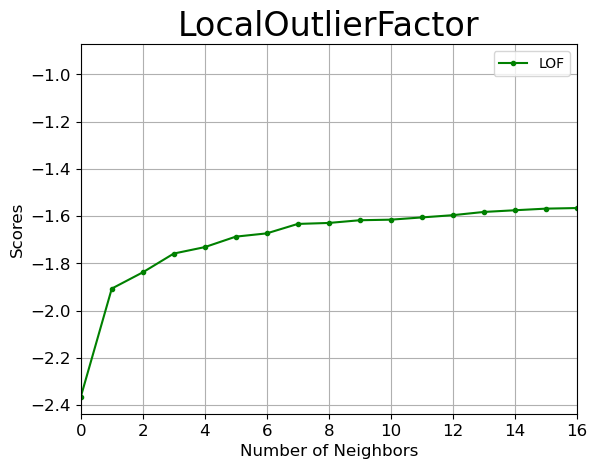

In [79]:
lof = LocalOutlierFactor(n_neighbors=20)
lof.fit_predict(data[numerical_columns])

df_scores = lof.negative_outlier_factor_
print(np.sort(df_scores)[0:6])

scores = pd.DataFrame(np.sort(df_scores))
plt.figure(figsize=(14, 10))
scores.plot(stacked=True, xlim=[0, 16], style=".-", color="green")
plt.title("LocalOutlierFactor", fontsize=24)
plt.xlabel("Number of Neighbors", fontsize=12)
plt.ylabel("Scores", fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid()
plt.legend(["LOF"])
plt.show()

### Explanation of the LocalOutlierFactor Code

```
lof = LocalOutlierFactor(n_neighbors=20)
```

This line initializes a LocalOutlierFactor object from the sklearn.neighbors module.

The parameter n_neighbors=20 specifies the number of neighbors to consider when determining the local density of points. A higher number can provide a more stable estimate of density but may overlook finer details.

```
lof.fit_predict(data[num_var])
```

Here, the LOF model is fitted to the dataset data[num_var], which should contain only numerical variables.

The method fit_predict() computes the LOF scores for each observation in the dataset and assigns a label indicating whether each point is an outlier or not (though this label is not stored in this case).

```
df_scores = lof.negative_outlier_factor_
```

This line retrieves the negative outlier factor scores for each observation. In LOF, lower scores indicate a higher likelihood of being an outlier.

The scores are stored in the variable df_scores.

```
print(np.sort(df_scores)[0:6])
```

This line sorts the outlier factor scores in ascending order and prints the first six values. These values represent the observations with the lowest (most negative) scores, indicating they are potential outliers

```
scores = pd.DataFrame(np.sort(df_scores))
```

A new DataFrame named scores is created from the sorted outlier factor scores, which will be used for plotting.

```
plt.figure(figsize=(14, 10))
scores.plot(stacked=True, xlim=[0, 16], style=".-", color="green")
```

A new figure is then created with a specified size of 14x10 inches.

The sorted scores are plotted using a stacked line plot with green dots connected by lines (style=".-"). The x-axis limit is set from 0 to 16.


```
plt.title("LocalOutlierFactor", fontsize=24)
plt.xlabel("Number of Neighbors", fontsize=12)
plt.ylabel("Scores", fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid()
plt.legend(["LOF"])
```

These lines add a title to the plot and labels for both axes, adjusting font sizes for clarity.
The grid is enabled for better readability, and a legend indicating "LOF" is added.

```
plt.show()
```

This line renders and displays the plot on the screen.

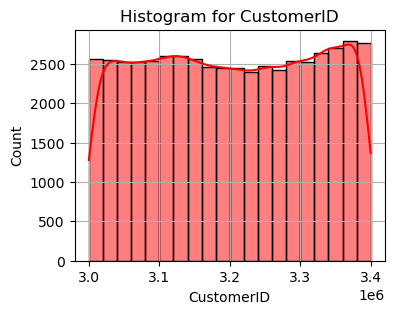

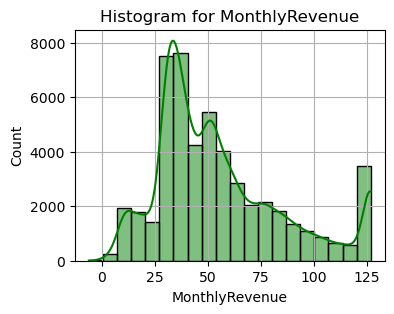

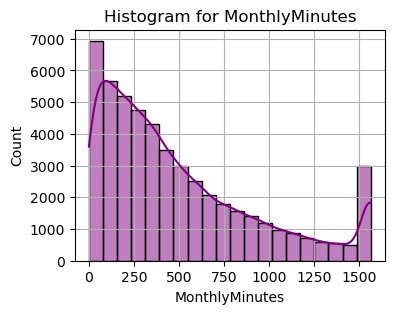

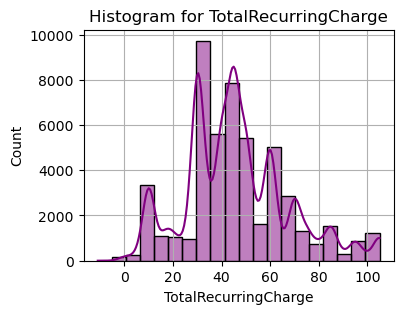

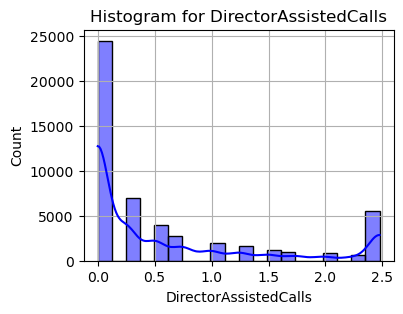

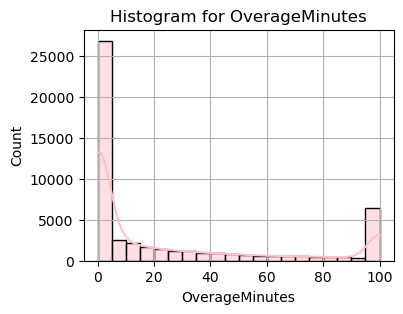

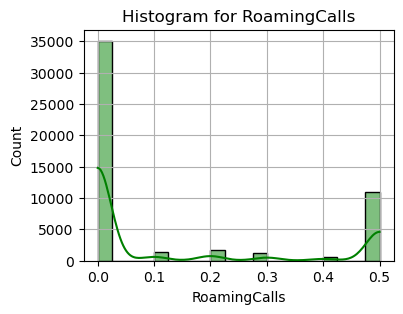

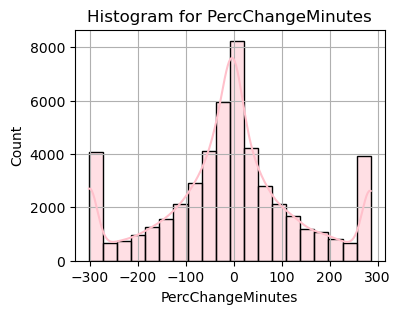

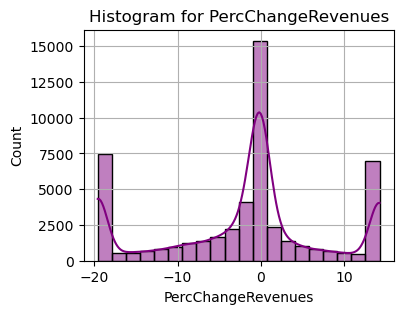

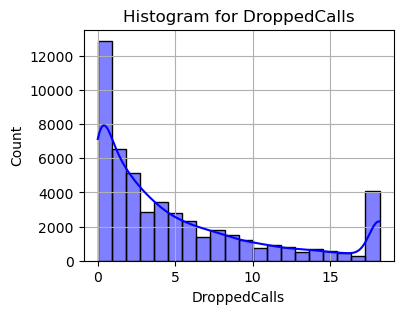

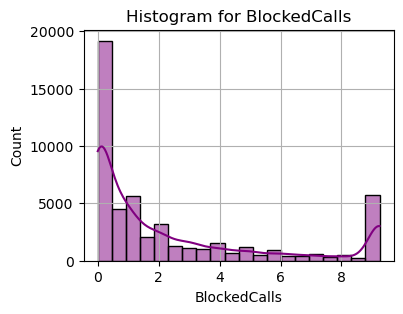

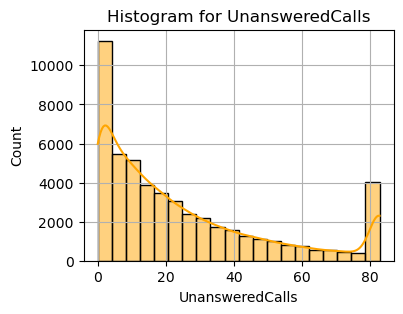

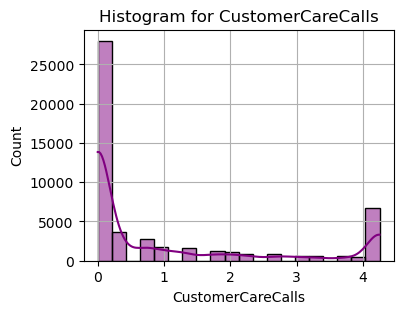

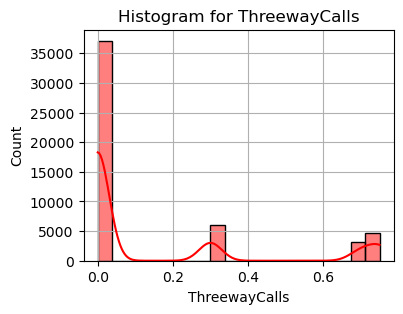

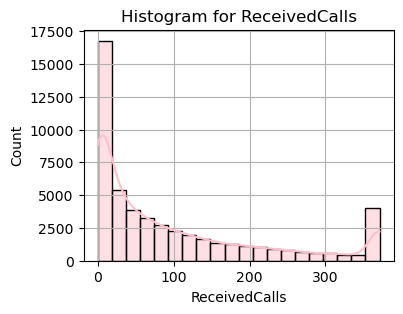

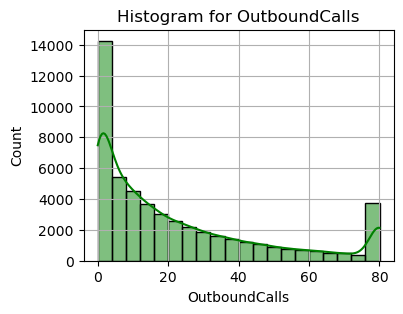

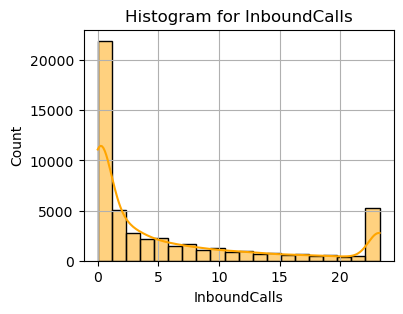

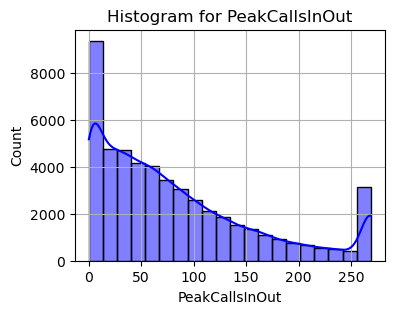

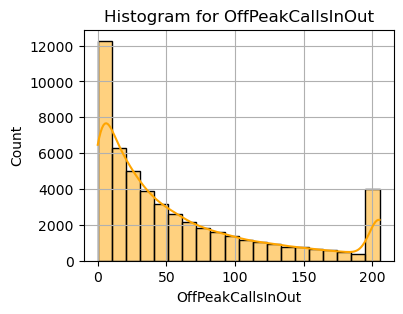

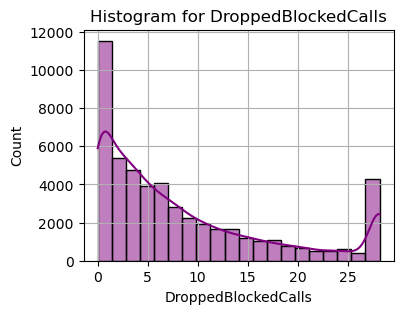

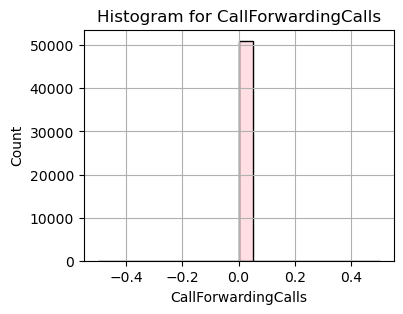

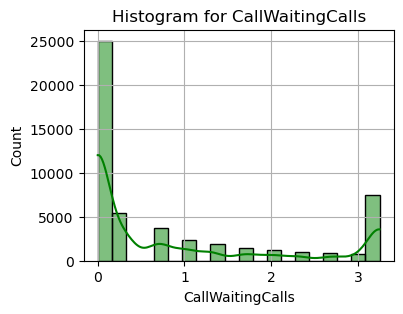

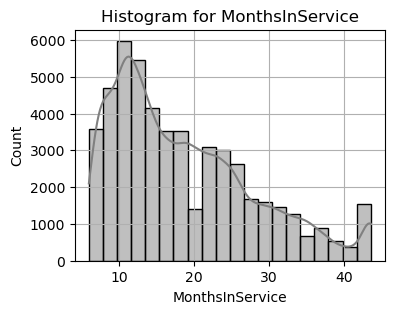

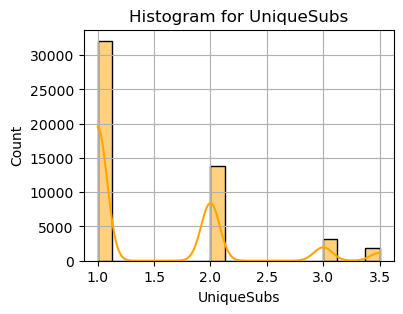

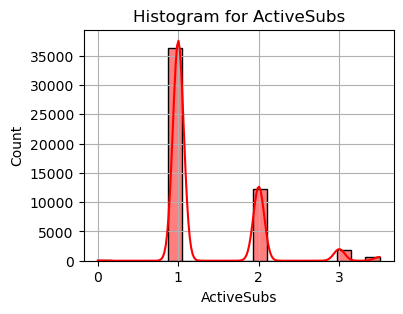

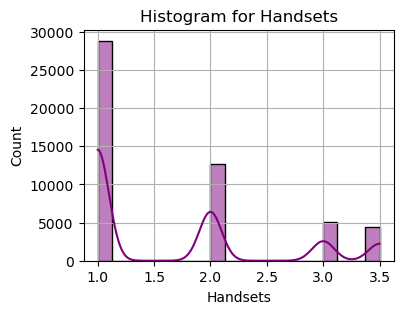

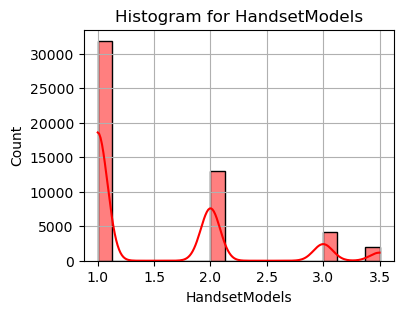

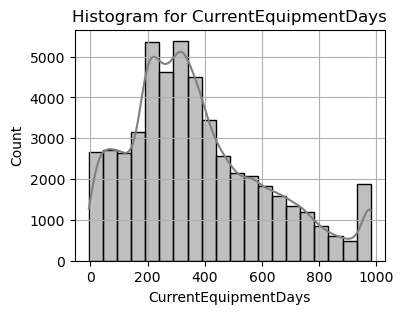

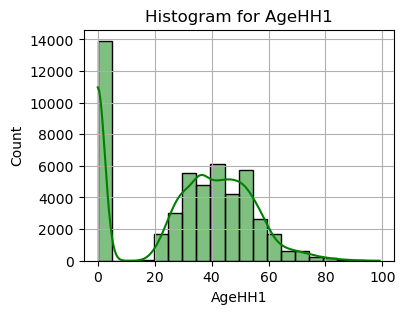

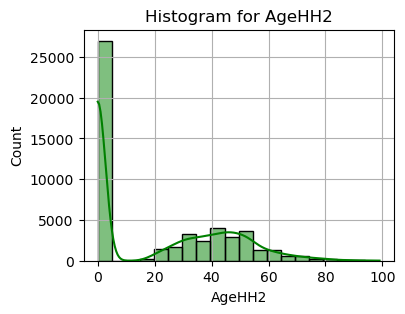

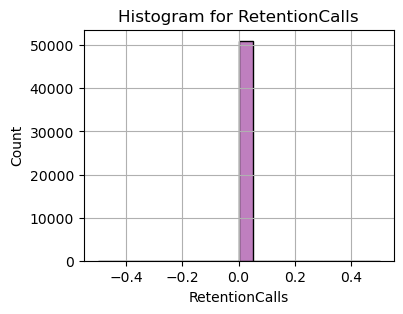

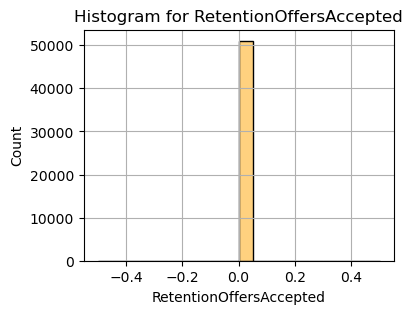

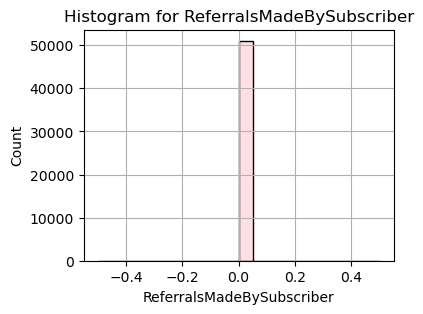

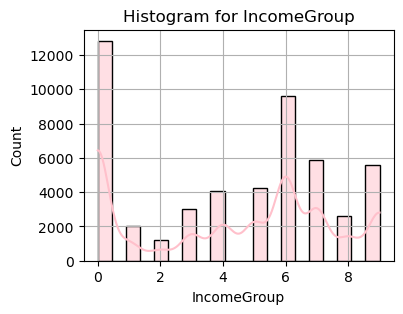

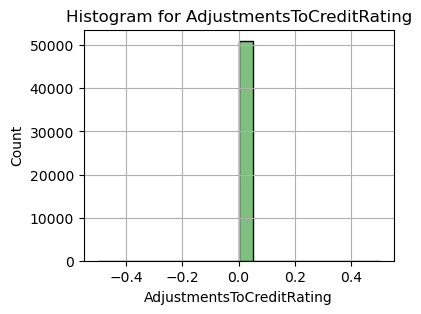

In [80]:
# This function is used to analyse the numeric variables of the dataset
def num_var_anal(dataframe, num_cols):
    
    for i in num_cols:
        plt.figure(figsize=(4, 3))
        sns.histplot(data=dataframe, 
                     x=i, bins=20,
                     color=random.choice(["green", "blue", "red", "gray",
                                          "orange", "pink", "purple"]),
                     kde=True)
        plt.title("Histogram for " + i)
        plt.xlabel(i)
        plt.ylabel("Count")
        plt.xticks(fontsize=10)
        plt.yticks(fontsize=10)
        plt.grid()
        plt.show()

num_var_anal(data, numerical_columns)


In [81]:
import scipy.stats as stats
skewness = data[numerical_columns].skew()
kurtosis = data[numerical_columns].kurtosis()

In [82]:
print("Skewness:\n", skewness)

Skewness:
 CustomerID                  -0.009563
MonthlyRevenue               0.913166
MonthlyMinutes               1.053921
TotalRecurringCharge         0.539475
DirectorAssistedCalls        1.334009
OverageMinutes               1.226644
RoamingCalls                 1.118461
PercChangeMinutes           -0.015463
PercChangeRevenues          -0.239009
DroppedCalls                 1.186847
BlockedCalls                 1.248496
UnansweredCalls              1.116835
CustomerCareCalls            1.255331
ThreewayCalls                1.517823
ReceivedCalls                1.193884
OutboundCalls                1.163198
InboundCalls                 1.250665
PeakCallsInOut               1.041746
OffPeakCallsInOut            1.154787
DroppedBlockedCalls          1.111375
CallForwardingCalls          0.000000
CallWaitingCalls             1.109419
MonthsInService              0.836918
UniqueSubs                   1.300347
ActiveSubs                   1.603364
Handsets                     0.956453
H

In [83]:
print("Kurtosis:\n", kurtosis)

Kurtosis:
 CustomerID                  -1.231102
MonthlyRevenue               0.121549
MonthlyMinutes               0.207985
TotalRecurringCharge         0.280426
DirectorAssistedCalls        0.346279
OverageMinutes              -0.057275
RoamingCalls                -0.616968
PercChangeMinutes           -0.065545
PercChangeRevenues          -0.491029
DroppedCalls                 0.291382
BlockedCalls                 0.166554
UnansweredCalls              0.181989
CustomerCareCalls           -0.042776
ThreewayCalls                0.651811
ReceivedCalls                0.238468
OutboundCalls                0.261029
InboundCalls                 0.163239
PeakCallsInOut               0.217140
OffPeakCallsInOut            0.197502
DroppedBlockedCalls          0.116889
CallForwardingCalls          0.000000
CallWaitingCalls            -0.377366
MonthsInService             -0.044554
UniqueSubs                   0.729395
ActiveSubs                   1.972427
Handsets                    -0.462678
H

Skewness and kurtosis provide insights into the shape of data distributions, which is crucial for statistical analysis and modeling. Many statistical tests assume normality; understanding these metrics helps assess whether this assumption holds.

In a normal distribution, skewness is expected to be 0, and kurtosis should be -3. If the skewness deviates from 0, it indicates that the distribution of the corresponding variable is either skewed to the right or left. Similarly, if the kurtosis value differs from -3, it suggests that the distribution is either more peaked or flatter at the peak compared to a normal distribution.

In [84]:
# investigating for  any presence of class imbalance in the target column
class_counts = data['Churn'].value_counts()
print(class_counts)

Churn
No     36336
Yes    14711
Name: count, dtype: int64


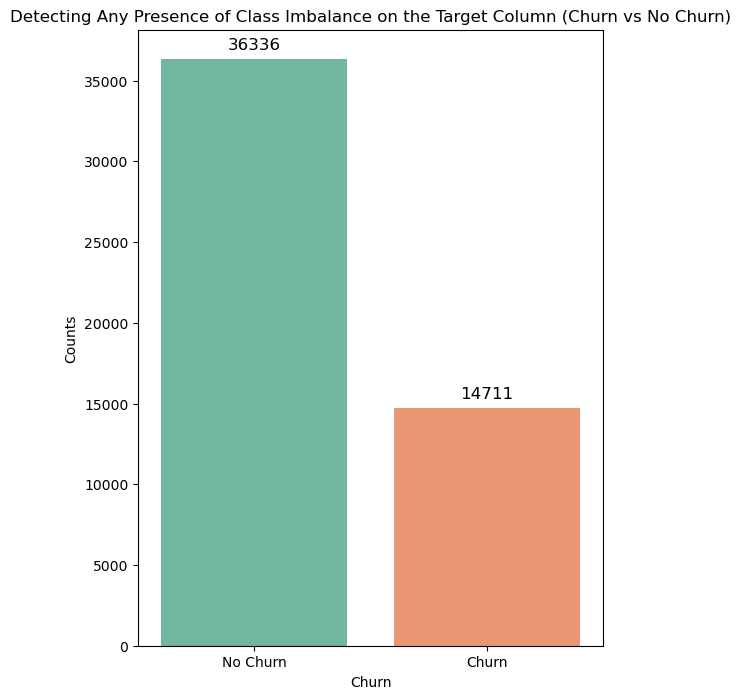

In [85]:
plt.figure(figsize=(6, 8))

# This Creates the bar plot
bar_plot = sns.barplot(x=class_counts.index, y=class_counts.values, hue=class_counts.index, palette='Set2', legend=False)

# Set title and labels
plt.title('Detecting Any Presence of Class Imbalance on the Target Column (Churn vs No Churn)')
plt.ylabel('Counts')
plt.xticks([0, 1], ['No Churn', 'Churn'])

# Display values on top of the bars
for p in bar_plot.patches:
    bar_plot.annotate(format(p.get_height(), '.0f'), 
                      (p.get_x() + p.get_width() / 2., p.get_height()), 
                      ha='center', va='bottom', 
                      fontsize=12, color='black', 
                      xytext=(0, 5),
                      textcoords='offset points')

# Show the plot
plt.show()

In [86]:
# encoding the categorical columns

label_encoders = {}
for col in categorical_columns:
    if col != 'Churn':  # Exclude target column
        le = LabelEncoder()
        data[col] = le.fit_transform(data[col])
        label_encoders[col] = le


In [87]:
# encoding the Churn column
le_churn = LabelEncoder()
data['Churn'] = le_churn.fit_transform(data['Churn'])

In [88]:
data.head()

,CustomerID,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,...,ReferralsMadeBySubscriber,IncomeGroup,OwnsMotorcycle,AdjustmentsToCreditRating,HandsetPrice,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus
0,3000002.0,1,24.00,219.0,22.0,0.25,0.0,0.0,-157.0,-19.0,...,0.0,4.0,0,0.0,8,1,2,2,4,0
1,3000010.0,1,16.99,10.0,17.0,0.00,0.0,0.0,-4.0,0.0,...,0.0,5.0,0,0.0,8,0,5,2,4,2
2,3000014.0,0,38.00,8.0,38.0,0.00,0.0,0.0,-2.0,0.0,...,0.0,6.0,0,0.0,15,0,0,3,1,2
3,3000022.0,0,82.28,1312.0,75.0,1.24,0.0,0.0,157.0,8.1,...,0.0,6.0,0,0.0,0,0,5,0,3,0
4,3000026.0,1,17.14,0.0,17.0,0.00,0.0,0.0,0.0,-0.2,...,0.0,9.0,0,0.0,0,0,2,0,4,2


In [89]:
# Analyzing the correlation between the Target variable and Numeric Variables
for variable in numerical_columns:
    print(f"Churn & {variable} : {data['Churn'].corr(data[variable])}")

# Creating a dictionary to store correlations
correlations = {variable: data['Churn'].corr(data[variable]) for variable in numerical_columns}

Churn & CustomerID : -0.041557523995996146
Churn & MonthlyRevenue : -0.01787815555257935
Churn & MonthlyMinutes : -0.05331388441144791
Churn & TotalRecurringCharge : -0.06463953378665309
Churn & DirectorAssistedCalls : -0.023664133948418646
Churn & OverageMinutes : 0.026805198370592417
Churn & RoamingCalls : -0.0017889919124882178
Churn & PercChangeMinutes : -0.04622303950752713
Churn & PercChangeRevenues : -0.006208447240010031
Churn & DroppedCalls : -0.01864951916848046
Churn & BlockedCalls : -0.01142833328945202
Churn & UnansweredCalls : -0.039415600627065166
Churn & CustomerCareCalls : -0.04973792776781413
Churn & ThreewayCalls : -0.031201897677146095
Churn & ReceivedCalls : -0.03992555175383285
Churn & OutboundCalls : -0.037262421861824525
Churn & InboundCalls : -0.04428946186394512
Churn & PeakCallsInOut : -0.04380138758715425
Churn & OffPeakCallsInOut : -0.04501216900723171
Churn & DroppedBlockedCalls : -0.01860324990253601
Churn & CallForwardingCalls : nan
Churn & CallWaitingCa

/home/ebuka/anaconda3/lib/python3.12/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/ebuka/anaconda3/lib/python3.12/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


Churn & ReferralsMadeBySubscriber : nan
Churn & IncomeGroup : -0.01270858570376129
Churn & AdjustmentsToCreditRating : nan


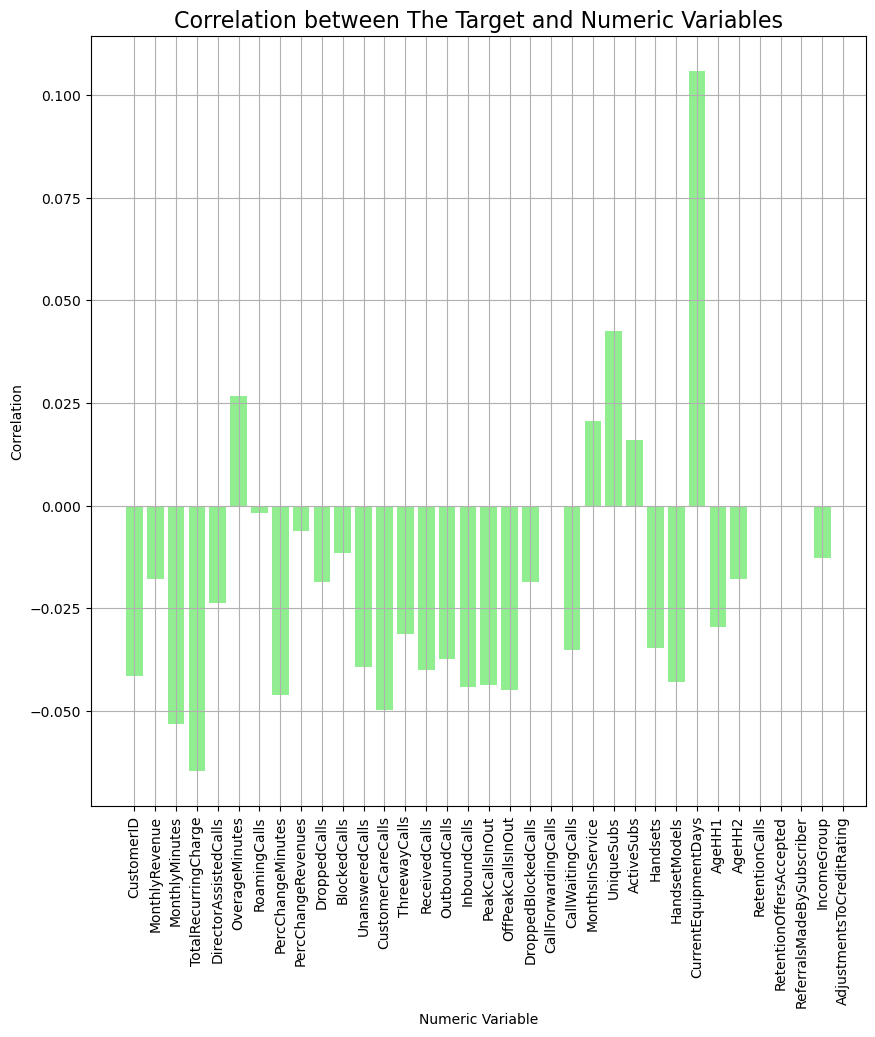

In [90]:
plt.figure(figsize=(10, 10))
plt.bar(correlations.keys(), correlations.values(), color='lightgreen')
plt.title('Correlation between The Target and Numeric Variables', fontsize=16)
plt.xlabel('Numeric Variable')
plt.ylabel('Correlation')
plt.xticks(rotation=90)
plt.grid()
plt.show()

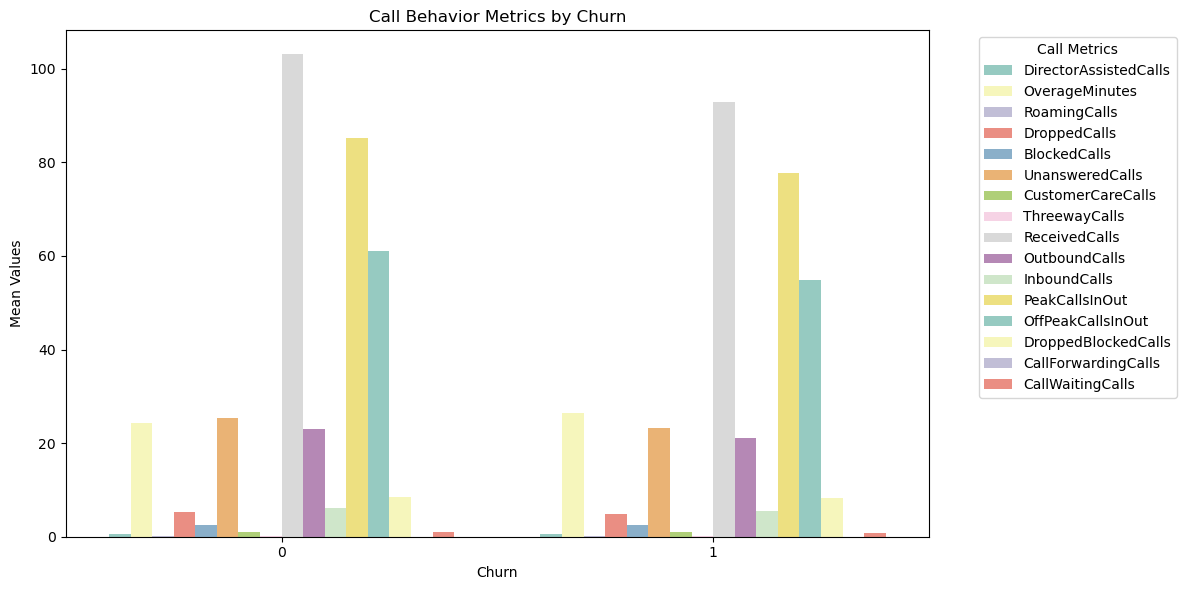

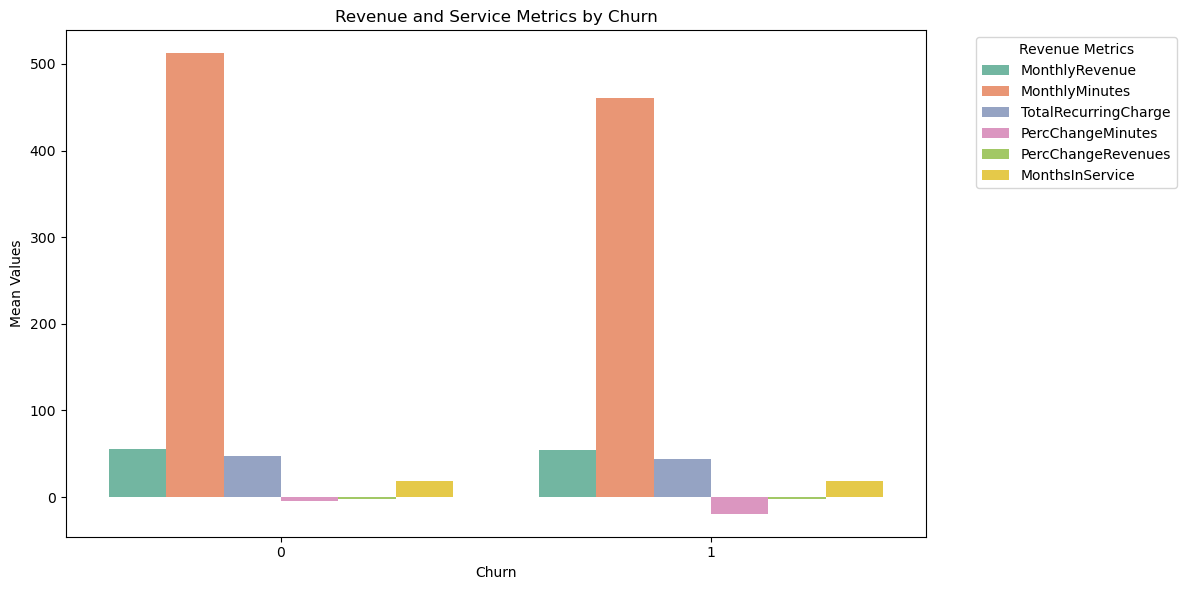

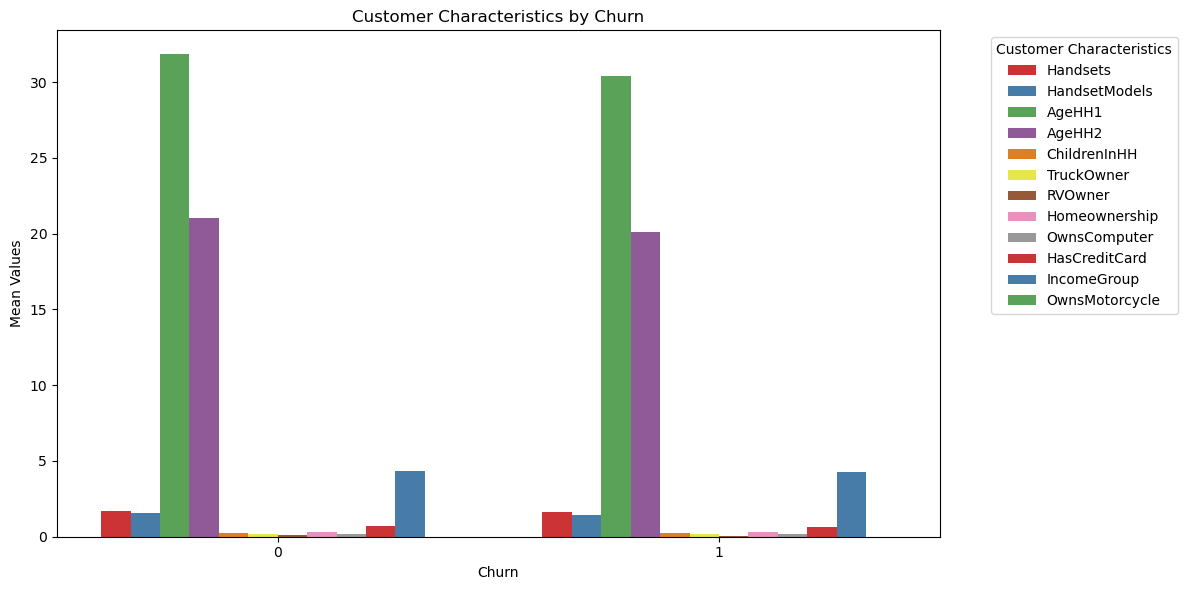

In [91]:
import seaborn as sns

# Grouping columns into logical categories
call_behavior_columns = [
    "DirectorAssistedCalls", "OverageMinutes", "RoamingCalls", 
    "DroppedCalls", "BlockedCalls", "UnansweredCalls", 
    "CustomerCareCalls", "ThreewayCalls", "ReceivedCalls", 
    "OutboundCalls", "InboundCalls", "PeakCallsInOut", 
    "OffPeakCallsInOut", "DroppedBlockedCalls", 
    "CallForwardingCalls", "CallWaitingCalls"
]

revenue_service_columns = [
    "MonthlyRevenue", "MonthlyMinutes", "TotalRecurringCharge", 
    "PercChangeMinutes", "PercChangeRevenues", "MonthsInService"
]

customer_characteristics_columns = [
    "Handsets", "HandsetModels", "AgeHH1", "AgeHH2", 
    "ChildrenInHH", "TruckOwner", "RVOwner", "Homeownership", 
    "OwnsComputer", "HasCreditCard", "IncomeGroup", 
    "OwnsMotorcycle"
]

# Grouping and calculating mean for Call Behavior Metrics by Churn
grouped_call_behavior = data.groupby("Churn")[call_behavior_columns].mean().reset_index()

# Melt for Seaborn compatibility
melted_call_behavior = grouped_call_behavior.melt(
    id_vars="Churn", 
    var_name="Call Metrics", 
    value_name="Mean Values"
)

# Plotting Call Behavior Metrics
plt.figure(figsize=(12, 6))
sns.barplot(data=melted_call_behavior, x="Churn", y="Mean Values", hue="Call Metrics", palette="Set3")
plt.title("Call Behavior Metrics by Churn")
plt.xlabel("Churn")
plt.ylabel("Mean Values")
plt.legend(title="Call Metrics", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

#  group and plot for Revenue and Service Metrics
grouped_revenue_service = data.groupby("Churn")[revenue_service_columns].mean().reset_index()
melted_revenue_service = grouped_revenue_service.melt(
    id_vars="Churn", 
    var_name="Revenue Metrics", 
    value_name="Mean Values"
)

plt.figure(figsize=(12, 6))
sns.barplot(data=melted_revenue_service, x="Churn", y="Mean Values", hue="Revenue Metrics", palette="Set2")
plt.title("Revenue and Service Metrics by Churn")
plt.xlabel("Churn")
plt.ylabel("Mean Values")
plt.legend(title="Revenue Metrics", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# group and plot for Customer Characteristics
grouped_customer_characteristics = data.groupby("Churn")[customer_characteristics_columns].mean().reset_index()
melted_customer_characteristics = grouped_customer_characteristics.melt(
    id_vars="Churn", 
    var_name="Customer Characteristics", 
    value_name="Mean Values"
)

plt.figure(figsize=(12, 6))
sns.barplot(data=melted_customer_characteristics, x="Churn", y="Mean Values", hue="Customer Characteristics", palette="Set1")
plt.title("Customer Characteristics by Churn")
plt.xlabel("Churn")
plt.ylabel("Mean Values")
plt.legend(title="Customer Characteristics", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


These plots compare various metrics of customers who have churned (Churn = 1) and those who have not (Churn = 0). The first plot focuses on call behavior, the second on revenue and service metrics, and the third on customer characteristics.


Chart 1: Call Behavior Metrics by Churn

Key Differences: The most prominent difference is in the "ReceivedCalls," "OutboundCalls", and "OverAgeMinutes" which are higher for the non-churn group (Churn 0), and the "PeakCallsInOut", "OffPeakCallsInOut" which are higher for the churned group (Churn = 1).

Interpretation: Customers who churn seem to make more calls during peak and off-peak times, and receive less calls and spend less time using their phone minutes compared to non churned customers.

Chart 2: Revenue and Service Metrics by Churn

Key Differences: Total recurring charges is considerably higher for the non-churn group (Churn = 0) compared to the churned group (Churn = 1).

Interpretation: Customers who do not churn tend to have a higher total recurring charge, but similar monthly revenue and minutes. The churn group also shows a larger negative % change in minutes compared to non churn groups.

Chart 3: Customer Characteristics by Churn

Key Differences: 'AgeHH1', 'AgeHH2', and 'Handsets' are slightly higher for the non-churned group (Churn = 0), while other variables are very similar.

Interpretation: Non-churn customers tend to be slightly older, and own slightly more handsets than churned customers.



Text(0.5, 1.0, 'Monthly Revenue by Device Characteristics')

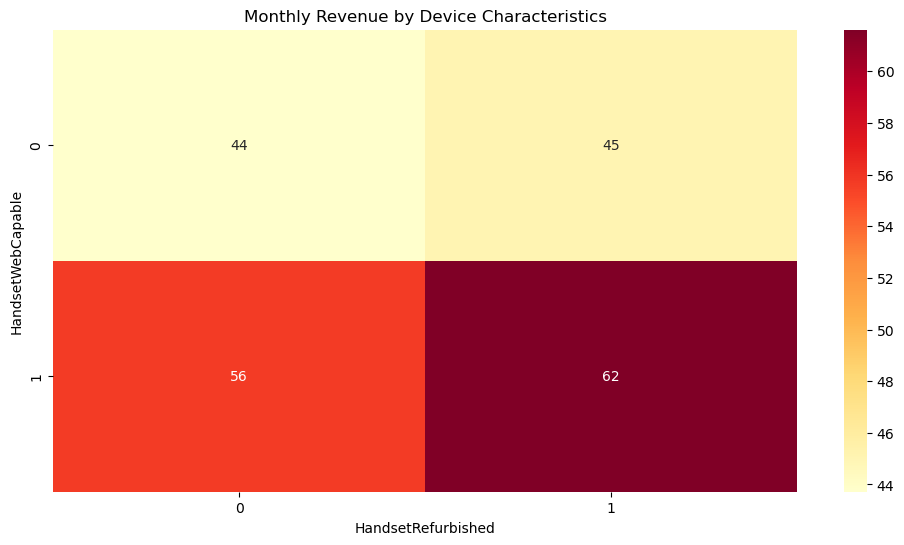

In [92]:
device_metrics = data.groupby(['HandsetWebCapable', 'HandsetRefurbished']).agg({
    'MonthlyRevenue': 'mean',
    'TotalRecurringCharge': 'mean',
    'CurrentEquipmentDays': 'mean'
}).reset_index()

plt.figure(figsize=(12, 6))
sns.heatmap(device_metrics.pivot_table(index='HandsetWebCapable', 
                                     columns='HandsetRefurbished', 
                                     values='MonthlyRevenue'),
            annot=True, cmap='YlOrRd')
plt.title('Monthly Revenue by Device Characteristics')

From this heatmap, these are the key insights:

Web Capability Matters: Handsets that are web-capable (HandsetWebCapable = 1) consistently generate higher monthly revenue than those that are not (HandsetWebCapable = 0). This holds true regardless of whether they are refurbished or not.

Refurbishment Status Affects Web Capable Handsets: While it seems refurbishment status barely changes the revenue of non web-capable handsets, for web capable handsets refurbishment seems to bring up the average monthly revenue a bit.

Highest Revenue Group: The combination of web-capable and refurbished handsets is where the highest average revenue is generated.


These are some actionable implications (Based on the data)

Promote Web-Capable Handsets: Since web-capable devices generate significantly more revenue, it makes sense to encourage and promote their usage, regardless if they are refurbished or not.

Refurbished Web-Capable Handsets Potential: Consider whether the cost of refurbishing web-capable handsets is justified by the bump in revenue.



<Axes: xlabel='MaritalStatus', ylabel='Average'>

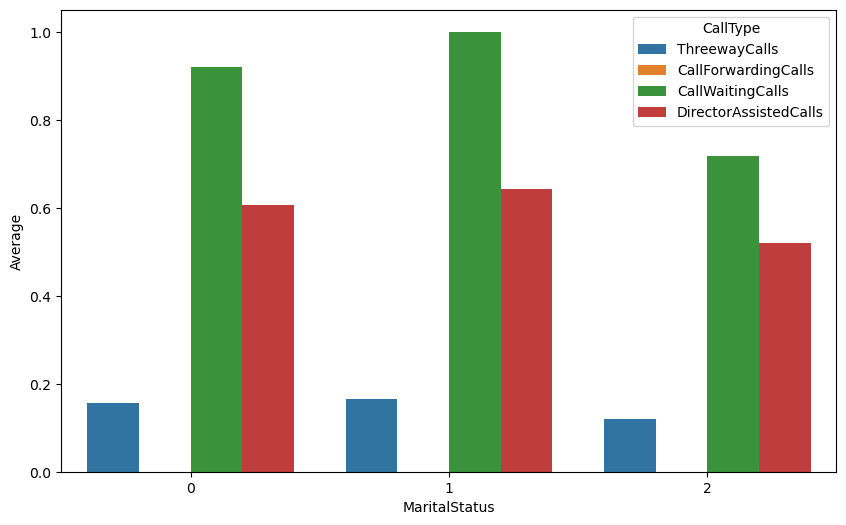

In [93]:

call_patterns = data.groupby('MaritalStatus').agg({
   'ThreewayCalls': 'mean',
   'CallForwardingCalls': 'mean', 
   'CallWaitingCalls': 'mean',
   'DirectorAssistedCalls': 'mean'
}).reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=call_patterns.melt(id_vars='MaritalStatus', var_name='CallType', value_name='Average'),
           x='MaritalStatus', y='Average', hue='CallType')


Interpretation of this chart:

The bar plot shows call feature usage across three marital status groups (0, 1, and 2). Call waiting is the most popular feature across all groups, while three-way calling and call forwarding are rarely or never used. Director-assisted calls are used moderately. Individuals in group 1 use call waiting the most, while group 0 uses director-assisted calls the least. We still need to know how the number codes map to actual marital statuses to give more specific interpretation.

<Axes: xlabel='AgeHH1', ylabel='MonthlyRevenue'>

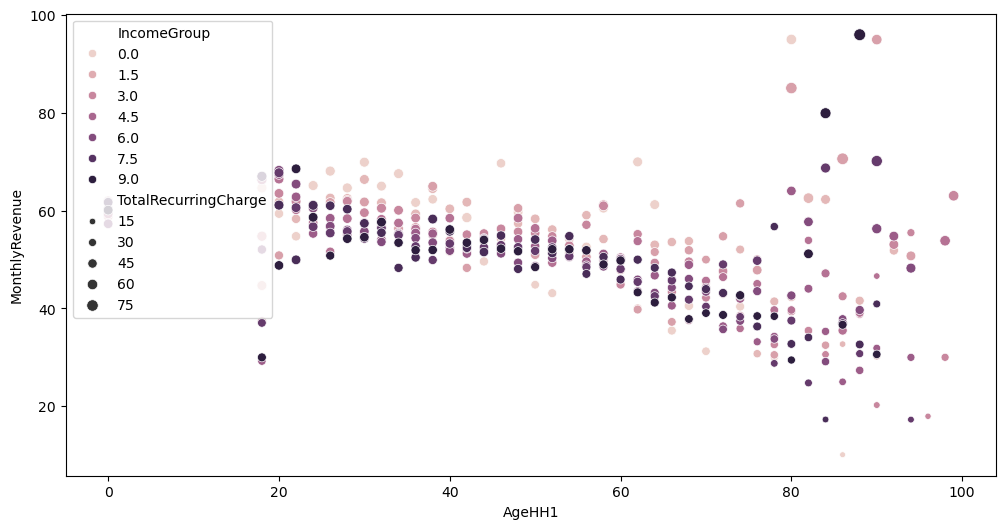

In [94]:
# Customer Value vs Demographics

value_demo = data.groupby(['IncomeGroup', 'AgeHH1']).agg({
   'MonthlyRevenue': 'mean',
   'TotalRecurringCharge': 'mean'
}).reset_index()

plt.figure(figsize=(12, 6))
sns.scatterplot(data=value_demo, x='AgeHH1', y='MonthlyRevenue', 
               hue='IncomeGroup', size='TotalRecurringCharge')


Interpretation of this chart:

The scatter plot visualizes the relationship between age (AgeHH1), monthly revenue, income group (color), and total recurring charges (point size). Monthly revenue tends to decrease slightly with age, particularly after around age 60. Higher income groups generally have higher monthly revenues across all age brackets, with the highest income groups having a notable increase around the 80-100 age range. Total recurring charges, indicated by point size, don't show a very strong relationship to age or revenue, though there's a noticeable tendency for points in the 20-50 range to be slightly larger, suggesting this demographic may contribute more to recurring revenue than other age groups.

<Axes: ylabel='CreditRating'>

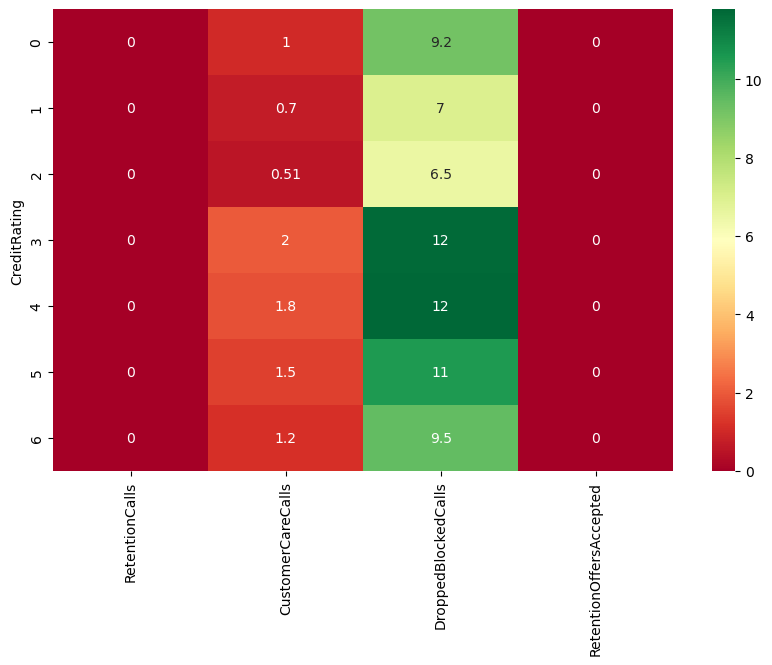

In [95]:
# 3. Retention Risk Factors
retention = data.groupby('CreditRating').agg({
   'RetentionCalls': 'mean',
   'CustomerCareCalls': 'mean',
   'DroppedBlockedCalls': 'mean',
   'RetentionOffersAccepted': 'mean'
}).reset_index()

plt.figure(figsize=(10, 6))
sns.heatmap(retention.set_index('CreditRating'), annot=True, cmap='RdYlGn')


The heatmap shows the average call patterns across different credit ratings (0-6). Retention calls and retention offers accepted are consistently zero across all credit ratings. Customer care calls increase with credit rating, peaking around rating 4 before declining, while dropped/blocked calls show the opposite pattern, generally decreasing as the credit rating increases, and peaking at rating 4 before slightly declining. There appears to be no correlation between credit rating and retention related activity as the values of "RetentionCalls" and "RetentionOffersAccepted" are all zero.

<Axes: ylabel='PrizmCode'>

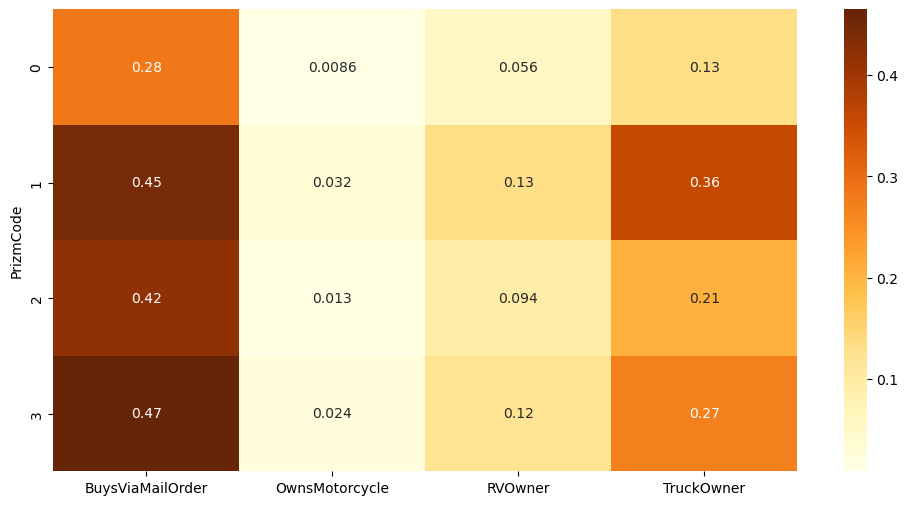

In [96]:
# 4. Lifestyle Segment Analysis
lifestyle = data.pivot_table(
   index='PrizmCode',
   values=['TruckOwner', 'RVOwner', 'OwnsMotorcycle', 'BuysViaMailOrder'],
   aggfunc='mean'
).head(10)  # Top 10 Prizm segments

plt.figure(figsize=(12, 6))
sns.heatmap(lifestyle, annot=True, cmap='YlOrBr')

The heatmap visualizes lifestyle segment behaviors across four Prizm codes (0-3). Buying via mail order is relatively common across all segments, with segments 1-3 showing a higher tendency than segment 0. Motorcycle ownership is consistently low for all segments, while RV ownership is slightly more common, and truck ownership is moderate, with segments 1 and 3 showing the highest levels. In summary, Prizm codes 1, 2, and 3 show similar tendencies for mail order and truck ownership.

In [97]:
# Create new feature for unsuccessful calls
data['total_unsuccessful_calls'] = data['DroppedCalls'] + data['BlockedCalls'] + data['UnansweredCalls']

In [98]:
data['CustomerServiceInteractionRatio'] = data['CustomerCareCalls'] / (
        data['ReceivedCalls'] + data['OutboundCalls'] + data['InboundCalls'] +
        data['DirectorAssistedCalls'] + data['ThreewayCalls'] +
        data['PeakCallsInOut'] + data['OffPeakCallsInOut'] + 1e-6
    )

Note: + 1e-6 is added to denominators in division to prevent "division by zero" errors. It's a tiny value (0.000001) that makes sure the denominator is never truly zero, avoiding crashes, while having a negligible effect when the denominator is not zero.

In [99]:
data['MinutesOverUsage'] = data['OverageMinutes'] / (data['MonthlyMinutes'] + 1e-6)

In [100]:
data['TotalRevenueGenerated'] = data['MonthlyRevenue'] + data['TotalRecurringCharge']

In [101]:
data['TotalCallFeaturesUsed'] = (
        data['CallForwardingCalls'] + data['CallWaitingCalls'] +
        data['ThreewayCalls'] + data['DirectorAssistedCalls']
    )

In [102]:
data.head()

,CustomerID,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,...,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus,total_unsuccessful_calls,CustomerServiceInteractionRatio,MinutesOverUsage,TotalRevenueGenerated,TotalCallFeaturesUsed
0,3000002.0,1,24.00,219.0,22.0,0.25,0.0,0.0,-157.0,-19.0,...,1,2,2,4,0,7.7,0.000000,0.0,46.00,0.55
1,3000010.0,1,16.99,10.0,17.0,0.00,0.0,0.0,-4.0,0.0,...,0,5,2,4,2,3.0,0.000000,0.0,33.99,0.00
2,3000014.0,0,38.00,8.0,38.0,0.00,0.0,0.0,-2.0,0.0,...,0,0,3,1,2,0.0,0.000000,0.0,76.00,0.00
3,3000022.0,0,82.28,1312.0,75.0,1.24,0.0,0.0,157.0,8.1,...,0,5,0,3,0,101.9,0.005452,0.0,157.28,5.24
4,3000026.0,1,17.14,0.0,17.0,0.00,0.0,0.0,0.0,-0.2,...,0,2,0,4,2,0.0,0.000000,0.0,34.14,0.00


# Building The Machine Learning Model

## An Important Observation When Building Trad ML For Fraud Prediction

When it comes to understanding why customers might leave a service, using traditional machine learning can be quite insightful. However, there are a few key aspects to consider:

- Balancing the Scales: Often, in churn analysis, there are far more customers who stay than those who leave, leading to what we call class imbalance. To address this, methods like SMOTE (Synthetic Minority Over-sampling Technique) or adjusting class weights can help balance our dataset, giving us a fairer view of both groups.
- Beyond Just Accuracy: Simply looking at how accurate our model is can be deceptive. In churn prediction, where the stakes are high, we need to look at more telling metrics like AUC (Area Under the Curve) and the F1-score. These give us a clearer picture of how well our model is truly performing across both churned and retained customers.
- Crafting Relevant Features: The art of feature engineering can't be overstated. It involves thoughtfully selecting and transforming data so that our model can learn from it effectively. This step is crucial in making sure we're not just predicting churn but understanding the why behind it.


By adopting these strategies, we not only enhance the accuracy of our churn prediction models but also ensure they are more reliable and reflective of real customer behavior. This approach helps businesses make more informed decisions, ultimately fostering better relationships with their customers

In [103]:

from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, RobustScaler, MinMaxScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier

In [44]:
data.columns

Index(['CustomerID', 'Churn', 'MonthlyRevenue', 'MonthlyMinutes',
       'TotalRecurringCharge', 'DirectorAssistedCalls', 'OverageMinutes',
       'RoamingCalls', 'PercChangeMinutes', 'PercChangeRevenues',
       'DroppedCalls', 'BlockedCalls', 'UnansweredCalls', 'CustomerCareCalls',
       'ThreewayCalls', 'ReceivedCalls', 'OutboundCalls', 'InboundCalls',
       'PeakCallsInOut', 'OffPeakCallsInOut', 'DroppedBlockedCalls',
       'CallForwardingCalls', 'CallWaitingCalls', 'MonthsInService',
       'UniqueSubs', 'ActiveSubs', 'ServiceArea', 'Handsets', 'HandsetModels',
       'CurrentEquipmentDays', 'AgeHH1', 'AgeHH2', 'ChildrenInHH',
       'HandsetRefurbished', 'HandsetWebCapable', 'TruckOwner', 'RVOwner',
       'Homeownership', 'BuysViaMailOrder', 'RespondsToMailOffers',
       'OptOutMailings', 'NonUSTravel', 'OwnsComputer', 'HasCreditCard',
       'RetentionCalls', 'RetentionOffersAccepted', 'NewCellphoneUser',
       'NotNewCellphoneUser', 'ReferralsMadeBySubscriber', 'IncomeGro

Now, when building these traditional machine learning models, not all columns or features of this dataset might be needed, due to the fact that some columns might add noise to the model performance.

My Target Variable (Churn): This is my target variable (what I am trying to predict).

Features to Exclude

These features are likely not relevant or are redundant and should be excluded from the model. Some of them might be useful for other analyses, but are not helpful for predicting churn:

- CustomerID: This is a unique identifier and does not provide any predictive power.

- ServiceArea: Not a customer level feature.

- ReceivedCalls: Redundant with other usage information.

- ReferralsMadeBySubscriber: A low priority feature for the goal of predicting churn.

- NewCellphoneUser, NotNewCellphoneUser: Redundant with other time based features.

- PrizmCode: May add many categorical features that may make the model less effective.

- Occupation, MaritalStatus: These are demographic features that are unlikely to be highly predictive of churn itself.

Good Predictor Features

These features are likely to be the most predictive and should form the basis of your model:

- total_unsuccessful_calls: (Engineered) A strong indicator of service issues and customer frustration.

- CustomerServiceInteractionRatio: (Engineered) High interaction with customer service suggests dissatisfaction.

- MinutesOverUsage: (Engineered) Suggests the customer may not be on the right plan and be evaluating other options.

- TotalRevenueGenerated: (Engineered) Highlights the value a customer brings.

- TotalCallFeaturesUsed: (Engineered) Indicates engagement with the service.

- RetentionCalls: A direct indicator of churn risk, but note the heatmap we made before, it might be too low to use.

- RetentionOffersAccepted: A direct indicator of churn risk, but note the heatmap we made before, it might be too low to use.

- MadeCallToRetentionTeam: A direct indicator that a customer is thinking of leaving.

- AdjustmentsToCreditRating: Shows if the customer had issues with billing or payments.

- MonthlyRevenue: A measure of the customer's value.

- TotalRecurringCharge: Indicates how much customers pay on a recurring basis.

- OverageMinutes: Reflects potential dissatisfaction and service plan issues.

- MonthsInService: There may be a relationship between how long a customer has been using a service and churn.

- PercChangeMinutes: Trends in minutes used may indicate churn.

- PercChangeRevenues: Trends in revenue may indicate churn.

- HandsetPrice: A good proxy for customer value and likely plan.

- CreditRating: May influence customer behavior.

- IncomeGroup: May influence customer behavior.

- AgeHH1, AgeHH2, ChildrenInHH: A demographic that may influence the value a customer provides.

These are the features that i am going to use for building the model

['Churn', 'total_unsuccessful_calls', 'CustomerServiceInteractionRatio', 'MinutesOverUsage',
 'TotalRevenueGenerated', 'TotalCallFeaturesUsed', 'RetentionCalls', 'RetentionOffersAccepted',
 'MadeCallToRetentionTeam', 'AdjustmentsToCreditRating', 'MonthlyRevenue', 'TotalRecurringCharge',
 'OverageMinutes', 'MonthsInService', 'PercChangeMinutes', 'PercChangeRevenues', 'HandsetPrice', 'CreditRating', 'IncomeGroup', 'AgeHH1', 'AgeHH2', 'ChildrenInHH']

In [45]:
features = ['Churn', 'total_unsuccessful_calls', 'CustomerServiceInteractionRatio', 'MinutesOverUsage',
 'TotalRevenueGenerated', 'TotalCallFeaturesUsed', 'RetentionCalls', 'RetentionOffersAccepted',
 'MadeCallToRetentionTeam', 'AdjustmentsToCreditRating', 'MonthlyRevenue', 'TotalRecurringCharge',
 'OverageMinutes', 'MonthsInService', 'PercChangeMinutes', 'PercChangeRevenues', 'HandsetPrice', 'CreditRating', 'IncomeGroup', 'AgeHH1', 'AgeHH2', 'ChildrenInHH']

In [46]:
data[features].head()

,Churn,total_unsuccessful_calls,CustomerServiceInteractionRatio,MinutesOverUsage,TotalRevenueGenerated,TotalCallFeaturesUsed,RetentionCalls,RetentionOffersAccepted,MadeCallToRetentionTeam,AdjustmentsToCreditRating,...,OverageMinutes,MonthsInService,PercChangeMinutes,PercChangeRevenues,HandsetPrice,CreditRating,IncomeGroup,AgeHH1,AgeHH2,ChildrenInHH
0,1,7.7,0.000000,0.0,46.00,0.55,0.0,0.0,1,0.0,...,0.0,43.5,-157.0,-19.0,8,0,4.0,62.0,0.0,0
1,1,3.0,0.000000,0.0,33.99,0.00,0.0,0.0,0,0.0,...,0.0,43.5,-4.0,0.0,8,3,5.0,40.0,42.0,1
2,0,0.0,0.000000,0.0,76.00,0.00,0.0,0.0,0,0.0,...,0.0,43.5,-2.0,0.0,15,2,6.0,26.0,26.0,1
3,0,101.9,0.005452,0.0,157.28,5.24,0.0,0.0,0,0.0,...,0.0,43.5,157.0,8.1,0,3,6.0,30.0,0.0,0
4,1,0.0,0.000000,0.0,34.14,0.00,0.0,0.0,0,0.0,...,0.0,43.5,0.0,-0.2,0,0,9.0,46.0,54.0,0


In [47]:
num_cols = data[features].select_dtypes(include=['int64', 'float64']).columns.tolist()
num_cols

['Churn',
 'total_unsuccessful_calls',
 'CustomerServiceInteractionRatio',
 'MinutesOverUsage',
 'TotalRevenueGenerated',
 'TotalCallFeaturesUsed',
 'RetentionCalls',
 'RetentionOffersAccepted',
 'MadeCallToRetentionTeam',
 'AdjustmentsToCreditRating',
 'MonthlyRevenue',
 'TotalRecurringCharge',
 'OverageMinutes',
 'MonthsInService',
 'PercChangeMinutes',
 'PercChangeRevenues',
 'HandsetPrice',
 'CreditRating',
 'IncomeGroup',
 'AgeHH1',
 'AgeHH2',
 'ChildrenInHH']

In [48]:
X = data[features].drop('Churn', axis=1)
y = data['Churn']

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [50]:
models  = {
    'RandomForest': RandomForestClassifier(random_state=42),
    'LogisticRegression': LogisticRegression(max_iter=1000, random_state=42),
    'XGBoost Classifier': XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
    
}

In [51]:
scaler = MinMaxScaler()


X_train_scaled = scaler.fit_transform(X_train)

X_test_scaled = scaler.transform(X_test)



In [105]:
numerical_features = ['total_unsuccessful_calls', 'CustomerServiceInteractionRatio', 'MinutesOverUsage',
                     'TotalRevenueGenerated', 'TotalCallFeaturesUsed', 'MonthlyRevenue', 'TotalRecurringCharge',
                     'OverageMinutes', 'MonthsInService', 'PercChangeMinutes', 'PercChangeRevenues',
                     'HandsetPrice']
label_encoded_features = ['CreditRating', 'IncomeGroup', 'AgeHH1', 'AgeHH2', 'ChildrenInHH']
binary_features = ['RetentionCalls', 'RetentionOffersAccepted', 'MadeCallToRetentionTeam', 'AdjustmentsToCreditRating']

In [106]:
X_train_scaled = scaler.fit_transform(X_train[numerical_features + label_encoded_features])
X_test_scaled = scaler.transform(X_test[numerical_features + label_encoded_features])


X_train_scaled = pd.DataFrame(X_train_scaled, index=X_train.index, columns = numerical_features + label_encoded_features)
X_test_scaled = pd.DataFrame(X_test_scaled, index=X_test.index, columns = numerical_features + label_encoded_features)


# Combine Preprocessed Features (including the binary features that don't need any transformation
X_train_preprocessed = pd.concat([X_train_scaled, X_train[binary_features]], axis=1)
X_test_preprocessed = pd.concat([X_test_scaled, X_test[binary_features]], axis=1)

In [107]:
X_train_preprocessed

,total_unsuccessful_calls,CustomerServiceInteractionRatio,MinutesOverUsage,TotalRevenueGenerated,TotalCallFeaturesUsed,MonthlyRevenue,TotalRecurringCharge,OverageMinutes,MonthsInService,PercChangeMinutes,...,HandsetPrice,CreditRating,IncomeGroup,AgeHH1,AgeHH2,ChildrenInHH,RetentionCalls,RetentionOffersAccepted,MadeCallToRetentionTeam,AdjustmentsToCreditRating
39797,0.067120,0.000000,0.000000,0.327270,0.108108,0.307184,0.379310,0.00,0.186667,0.466837,...,1.000000,0.333333,0.666667,0.323232,0.323232,1.0,0.0,0.0,0,0.0
31981,0.475283,0.006032,0.031690,0.330916,0.154440,0.313871,0.379310,0.27,0.106667,0.000000,...,1.000000,0.500000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0,0.0
31916,0.106122,0.030742,0.000000,0.541872,0.344402,0.497896,0.612069,0.00,0.160000,0.466837,...,0.333333,0.666667,0.111111,0.323232,0.000000,0.0,0.0,0.0,0,0.0
39880,0.402721,0.000000,0.000000,0.501803,0.154440,0.424406,0.612069,0.00,0.133333,0.774660,...,1.000000,0.166667,0.444444,0.282828,0.000000,0.0,0.0,0.0,0,0.0
23187,0.528345,0.004615,0.004847,0.142781,0.460232,0.141644,0.181034,0.03,0.373333,0.373299,...,0.000000,0.000000,0.666667,0.404040,0.383838,0.0,0.0,0.0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11284,0.051701,0.000000,0.000000,0.132825,0.038610,0.123384,0.181034,0.00,0.453333,0.473639,...,1.000000,0.000000,1.000000,0.383838,0.363636,1.0,0.0,0.0,0,0.0
44732,0.668934,0.009269,0.000000,0.500492,0.046332,0.422002,0.612069,0.00,0.160000,0.422619,...,1.000000,0.333333,0.777778,0.464646,0.000000,0.0,0.0,0.0,0,0.0
38158,0.096145,0.000000,0.000000,0.377581,0.000000,0.309288,0.482759,0.00,0.133333,0.473639,...,1.000000,0.166667,0.111111,0.404040,0.383838,0.0,0.0,0.0,0,0.0
860,0.925170,0.001688,0.063837,1.000000,0.548263,1.000000,1.000000,1.00,1.000000,1.000000,...,0.200000,0.000000,0.444444,0.404040,0.000000,0.0,0.0,0.0,0,0.0


In [108]:
# train and evaluate each model
from sklearn.pipeline import Pipeline
for model_name, model in models.items():
    pipeline = Pipeline(
        steps=[('classifier', model)]
    )

    # fit the model
    pipeline.fit(X_train_preprocessed, y_train)

    # make a prediction on the test set
    y_pred = pipeline.predict(X_test_preprocessed)

    # evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)

    # print the results
    print(f"Model: {model_name}")
    print(f"Accuracy: {accuracy:.4f}")
    print("The Classification Report:")
    print(report)
    print("\n" + "-"*60 + "\n")

Model: RandomForest
Accuracy: 0.7193
The Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.97      0.83      7308
           1       0.54      0.09      0.16      2902

    accuracy                           0.72     10210
   macro avg       0.63      0.53      0.50     10210
weighted avg       0.67      0.72      0.64     10210


------------------------------------------------------------

Model: LogisticRegression
Accuracy: 0.7149
The Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.99      0.83      7308
           1       0.46      0.02      0.03      2902

    accuracy                           0.71     10210
   macro avg       0.59      0.50      0.43     10210
weighted avg       0.64      0.71      0.61     10210


------------------------------------------------------------



/home/ebuka/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [07:18:44] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Model: XGBoost Classifier
Accuracy: 0.7123
The Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.93      0.82      7308
           1       0.48      0.17      0.25      2902

    accuracy                           0.71     10210
   macro avg       0.61      0.55      0.54     10210
weighted avg       0.66      0.71      0.66     10210


------------------------------------------------------------



In [54]:
# now i will apply SMOTE because I need to fix the issue of the class imbalance

from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

for model_name, model in  models.items():
    pipeline = Pipeline(
        steps=[('preprocessor', preprocessor),
               ('smote', SMOTE(random_state=42)),
               ('classifier', model)]
    )

    # fit the model
    pipeline.fit(X_train, y_train)

    # make a prediction on the test set
    y_pred = pipeline.predict(X_test)

    #evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)

    # print the results 
    print(f"Model: {model_name}")
    print(f"Accuracy: {accuracy:.4f}")
    print("The Classification Report:")
    print(report)
    print("\n" + "-"*60 + "\n")



Model: RandomForest
Accuracy: 0.6836
The Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.87      0.80      7268
           1       0.41      0.23      0.30      2942

    accuracy                           0.68     10210
   macro avg       0.57      0.55      0.55     10210
weighted avg       0.64      0.68      0.65     10210


------------------------------------------------------------

Model: LogisticRegression
Accuracy: 0.5664
The Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.57      0.65      7268
           1       0.35      0.57      0.43      2942

    accuracy                           0.57     10210
   macro avg       0.56      0.57      0.54     10210
weighted avg       0.64      0.57      0.59     10210


------------------------------------------------------------



/home/ebuka/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [20:06:17] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Model: XGBoost Classifier
Accuracy: 0.6958
The Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.90      0.81      7268
           1       0.44      0.19      0.27      2942

    accuracy                           0.70     10210
   macro avg       0.59      0.55      0.54     10210
weighted avg       0.65      0.70      0.65     10210


------------------------------------------------------------



In [55]:
# hyperparameter optimization

models = {
    'RandomForest': {
        'classifier': RandomForestClassifier(random_state=42),
        'params': {
            'classifier__n_estimators': [50, 100, 200],
            'classifier__max_depth': [None, 10, 20, 30],
            'classifier__min_samples_split': [2,5,10],
            'classifier__min_samples_leaf': [1,2,4]
        }
    },

    'LogisticRegression' : {
        'classifier': LogisticRegression(max_iter=1000, random_state=42),
        'params': {
            'classifier__C': np.logspace(-4, 4, 20),
            'classifier__penalty': ['l1', 'l2'],
            'classifier__solver': ['liblinear']
        }
    },
    'XGBoost Classifier' : {
        'classifier' : XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
        'params' : {
            'classifier__n_estimators': [50, 100, 200],
            'classifier__max_depth': [3, 6, 10],
            'classifier__learning_rate': [0.01, 0.1, 0.2, 0.3],
            'classifier__subsample': [0.7, 0.8, 0.9, 1.0]
        }
    }
}


for model_name, model_dict in models.items():
    pipeline = Pipeline(steps= [
        ('preprocessor', preprocessor),
        ('smote', SMOTE(random_state=42)),
        ('classifier', model_dict['classifier'])
    ])

    random_cv = RandomizedSearchCV(
        pipeline,
        param_distributions= model_dict['params'],
        n_iter= 10,
        scoring= 'f1',
        cv=3,
        random_state=42,
        n_jobs= -1
    )

    # fitting the model with RandomizedSearchCV
    random_cv.fit(X_train, y_train)

    # predict on the test set
    y_pred = random_cv.best_estimator_.predict(X_test)

    #model evaluation
    accuracy= accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)

    print(f"Model: {model_name}")
    print(f"The Models Best Parameters: {random_cv.best_params_}")
    print(f"Accuracy score: {accuracy:.4f}")
    print("Classification Report:")
    print(report)
    print("\n" + "-"*60 + "\n")


Model: RandomForest
The Models Best Parameters: {'classifier__n_estimators': 50, 'classifier__min_samples_split': 2, 'classifier__min_samples_leaf': 4, 'classifier__max_depth': 10}
Accuracy score: 0.6210
Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.68      0.72      7268
           1       0.38      0.48      0.42      2942

    accuracy                           0.62     10210
   macro avg       0.57      0.58      0.57     10210
weighted avg       0.65      0.62      0.63     10210


------------------------------------------------------------

Model: LogisticRegression
The Models Best Parameters: {'classifier__solver': 'liblinear', 'classifier__penalty': 'l2', 'classifier__C': 29.763514416313132}
Accuracy score: 0.5653
Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.56      0.65      7268
           1       0.35      0.57      0.43      2942

    accuracy     

/home/ebuka/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [20:20:03] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/ebuka/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [20:20:03] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/ebuka/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [20:20:04] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/ebuka/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [20:20:04] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/ebuka/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [20:20:11] WARNING: /wo

Model: XGBoost Classifier
The Models Best Parameters: {'classifier__subsample': 0.7, 'classifier__n_estimators': 50, 'classifier__max_depth': 6, 'classifier__learning_rate': 0.01}
Accuracy score: 0.5892
Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.59      0.67      7268
           1       0.37      0.59      0.45      2942

    accuracy                           0.59     10210
   macro avg       0.57      0.59      0.56     10210
weighted avg       0.66      0.59      0.61     10210


------------------------------------------------------------



**Understanding the Evaluation Metrics**

This report details the evaluation of three distinct classification models—RandomForest, Logistic Regression, and XGBoost Classifier—for predicting customer churn. Model performance was assessed using precision, recall, and F1-score, with a particular emphasis on the minority class (churners, labeled as class '1'), given the inherent class imbalance in the data.

Before I  dive into the specifics, it's important to understand the evaluation metrics you're using:

*   **Accuracy:** The proportion of correctly classified instances (both churn and non-churn). This can be misleading on imbalanced datasets, as a model might get a high accuracy by correctly predicting mostly the majority class (non-churn), while not detecting the minority class (churners).

*   **Precision:** Of all the instances the model predicted to churn, what percentage actually churned? High precision means fewer false positives (fewer cases where the model predicts churn when the customer doesn't churn).

*   **Recall (Sensitivity):** Of all the customers that churned, what percentage did the model correctly identify? High recall means fewer false negatives (fewer cases where the model missed identifying a churner).

*   **F1-Score:** The harmonic mean of precision and recall. This metric is a balanced measure that combines the effects of precision and recall. When you have an imbalanced dataset, F1 is generally more useful than accuracy.

*   **Support:** The number of actual occurrences of each class in the test set.

*   **Recall is important in churn**: In churn detection, we  need to be able to identify customers that churn (high recall) to prevent churn. It is generally more costly to miss a customer than to incorrectly identify them. You might decide on a model that gives you a higher recall at the expense of some precision.




*   **RandomForest:**
    *   The RandomForest model exhibited a recall of 0.48 for the churn class, signifying that it correctly identified 48% of true positive instances.
    *   Its precision for the churn class was measured at 0.38, suggesting that 38% of instances predicted as churn were indeed true churners.
    *   This resulted in an F1-score of 0.42 for the churn class, which indicates a moderate harmonic mean of precision and recall for this class.
    *   *Interpretation:* The RandomForest exhibits a modest capability in identifying churners, demonstrating an expected trade-off between recall and precision.

*   **Logistic Regression:**
    *  The Logistic Regression model attained a recall of 0.57 for the churn class, correctly classifying 57% of the true positive instances.
    *   Its precision for the churn class was 0.35, indicating that only 35% of predicted churners actually churned.
    *   The F1-score of 0.43 for the churn class signifies a moderate performance balance between recall and precision.
    *   *Interpretation:* While achieving higher recall, this is accompanied by a notable decrease in precision.

*   **XGBoost Classifier:**
    *   The XGBoost model achieved a recall of 0.59 for the churn class, denoting the identification of 59% of the true churners.
    *   Its precision for the churn class was measured at 0.37, meaning that 37% of those predicted to be churners actually churned.
    *  The F1-score of 0.45 for the churn class shows a better balance of precision and recall compared to the other two models.
    *    *Interpretation:* The XGBoost Classifier model demonstrates a higher capability in detecting churners in comparison to the other models while having an acceptable level of precision.

**Comparative Analysis (Minority Class Focused)**

To facilitate a focused comparison regarding the minority class, the models were ranked based on the following metrics:

*   **Recall:**
    *   The XGBoost Classifier model demonstrated the highest recall (0.59), followed closely by the Logistic Regression model (0.57), with the RandomForest exhibiting the lowest recall (0.48).
*   **Precision:**
      *   The RandomForest model exhibited the highest precision (0.38), closely followed by the XGBoost Classifier model (0.37), with the Logistic Regression model having the lowest precision score (0.35).
*   **F1-Score:**
    *   The XGBoost Classifier model produced the highest F1-score (0.45), followed closely by the Logistic Regression model (0.43), and then by the RandomForest model (0.42).

**Model Selection and Recommendations**

Given the priority on the identification of churners (i.e., recall), while still maintaining a good balance in other metrics, the **XGBoost Classifier is deemed the most performant model** in this evaluation.

The rationale for this selection is threefold:

*   **Superior Recall:**  The XGBoost model shows a higher recall compared to the rest, indicating its higher proficiency in capturing true positive instances of churn.
*    **Best F1-Score:** The model also has the highest f1-score, which indicates that it has a good balance of precision and recall.
*    **Acceptable Precision:** Even though it is not the model with the highest precision, the XGBoost Classifier has an acceptable precision that does not drastically impact its performance.

By contrast:

*    While achieving higher recall than the RandomForest model, the **Logistic Regression** also has a lower precision, resulting in a performance that is not better than the XGBoost model.
*   While exhibiting a better precision compared to the other models, the **RandomForest** model lags behind in recall and in f1-score, therefore underperforming.

**Recommendations for Further Research:**

It is recommended to adopt the XGBoost classifier as the current baseline for churn prediction.


Based on the metrics focused on the detection of the churners class, with an emphasis on recall and f1-score, the **XGBoost Classifier** demonstrates superior performance among the three models, having both the highest recall and the highest f1-score. The model should be used as the current baseline and future work should be done to improve all aspects of the model, by using different sampling techniques, more feature engineering and a better model search.


In [56]:
import pickle

# Loop through models and perform hyperparameter optimization
for model_name, model_dict in models.items():
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('smote', SMOTE(random_state=42)),
        ('classifier', model_dict['classifier'])
    ])

    random_cv = RandomizedSearchCV(
        pipeline,
        param_distributions=model_dict['params'],
        n_iter=10,
        scoring='f1',
        cv=3,
        random_state=42,
        n_jobs=-1
    )

    # Fitting the model with RandomizedSearchCV
    random_cv.fit(X_train, y_train)

    # Predict on the test set
    y_pred = random_cv.best_estimator_.predict(X_test)

    # Model evaluation
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)

    print(f"Model: {model_name}")
    print(f"The Model's Best Parameters: {random_cv.best_params_}")
    print(f"Accuracy Score: {accuracy:.4f}")
    print("Classification Report:")
    print(report)
    print("\n" + "-" * 60 + "\n")

    # Save the best XGBoost Classifier model
    if model_name == 'XGBoost Classifier':
        best_xgb_model = random_cv.best_estimator_
        filename = 'xgboost_model.sav'
        with open(filename, 'wb') as file:
            pickle.dump(best_xgb_model, file)
        print(f"The XGBoost model has been saved as '{filename}'.")


Model: RandomForest
The Model's Best Parameters: {'classifier__n_estimators': 50, 'classifier__min_samples_split': 2, 'classifier__min_samples_leaf': 4, 'classifier__max_depth': 10}
Accuracy Score: 0.6210
Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.68      0.72      7268
           1       0.38      0.48      0.42      2942

    accuracy                           0.62     10210
   macro avg       0.57      0.58      0.57     10210
weighted avg       0.65      0.62      0.63     10210


------------------------------------------------------------

Model: LogisticRegression
The Model's Best Parameters: {'classifier__solver': 'liblinear', 'classifier__penalty': 'l2', 'classifier__C': 29.763514416313132}
Accuracy Score: 0.5653
Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.56      0.65      7268
           1       0.35      0.57      0.43      2942

    accuracy   

/home/ebuka/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [20:35:39] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/ebuka/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [20:35:41] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/ebuka/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [20:35:42] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/ebuka/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [20:35:43] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/ebuka/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [20:35:49] WARNING: /wo

Model: XGBoost Classifier
The Model's Best Parameters: {'classifier__subsample': 0.7, 'classifier__n_estimators': 50, 'classifier__max_depth': 6, 'classifier__learning_rate': 0.01}
Accuracy Score: 0.5892
Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.59      0.67      7268
           1       0.37      0.59      0.45      2942

    accuracy                           0.59     10210
   macro avg       0.57      0.59      0.56     10210
weighted avg       0.66      0.59      0.61     10210


------------------------------------------------------------

The XGBoost model has been saved as 'xgboost_model.sav'.


In [57]:
import pandas as pd
import joblib
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import ColumnTransformer


# 1. Load the Trained Model
model_path = 'xgboost_model.sav'  # Replace with the actual path to your .sav file
try:
    pipeline = joblib.load(model_path)
    print("Model successfully loaded.")
except Exception as e:
    print(f"Error loading model: {e}")
    exit()  # Exit if the model cannot be loaded


# 2. New Sample Data
new_data = {
    'total_unsuccessful_calls': [1, 5, 0, 2],
    'CustomerServiceInteractionRatio': [0.1, 0.5, 0.0, 0.2],
    'MinutesOverUsage': [0.2, 1.0, 0.0, 0.3],
    'TotalRevenueGenerated': [70, 150, 40, 90],
    'TotalCallFeaturesUsed': [3, 1, 2, 0],
    'RetentionCalls': [0, 1, 0, 0],
    'RetentionOffersAccepted': [0, 0, 0, 0],
    'MadeCallToRetentionTeam': [0, 1, 0, 0],
    'AdjustmentsToCreditRating': [0, -1, 0, 1],
    'MonthlyRevenue': [60, 120, 35, 80],
    'TotalRecurringCharge': [10, 30, 5, 10],
    'OverageMinutes': [10, 50, 0, 15],
    'MonthsInService': [12, 30, 5, 10],
    'PercChangeMinutes': [0.05, -0.2, 0.1, 0.0],
    'PercChangeRevenues': [-0.1, 0.1, 0.0, -0.05],
    'HandsetPrice': [200, 600, 100, 300],
    'CreditRating': [2, 5, 1, 3],
     'IncomeGroup': [3, 7, 2, 4],
    'AgeHH1': [35, 50, 25, 40],
    'AgeHH2': [30, 45, 20, 35],
    'ChildrenInHH': [1, 2, 0, 1]
}

# 3. Load the New Data into a DataFrame
try:
    new_df = pd.DataFrame(new_data)
except Exception as e:
    print(f"Error creating DataFrame: {e}")
    exit()  # Exit if the DataFrame cannot be created

# 4. Define the features
features = ['total_unsuccessful_calls', 'CustomerServiceInteractionRatio', 'MinutesOverUsage',
 'TotalRevenueGenerated', 'TotalCallFeaturesUsed', 'RetentionCalls', 'RetentionOffersAccepted',
 'MadeCallToRetentionTeam', 'AdjustmentsToCreditRating', 'MonthlyRevenue', 'TotalRecurringCharge',
 'OverageMinutes', 'MonthsInService', 'PercChangeMinutes', 'PercChangeRevenues', 'HandsetPrice', 'CreditRating', 'IncomeGroup', 'AgeHH1', 'AgeHH2', 'ChildrenInHH']


# 5. Select only the features used in training
try:
    new_df = new_df[features]
except KeyError as e:
    print(f"Error: The input data is missing features: {e}. Please make sure it matches the model training features")
    exit()  # Exit if the model cannot be loaded

# 6. Make Predictions
try:
    predictions = pipeline.predict(new_df)
    probabilities = pipeline.predict_proba(new_df)[:, 1] # Probability for class 1 (churn)

except Exception as e:
    print(f"Error during prediction: {e}")
    exit()  # Exit if there is an error during prediction


# 7. Combine Predictions and Probabilities with the new data
new_df['predicted_churn'] = predictions
new_df['churn_probability'] = probabilities

# 8. Print Results
print(new_df[['predicted_churn', 'churn_probability']])

Model successfully loaded.
   predicted_churn  churn_probability
0                1           0.527790
1                1           0.505761
2                0           0.408480
3                0           0.458600
